In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Introducción 

La idea de la práctica es visitar aquellos temas que en cierta manera nos permitan ver más contenido del curso.

La práctica esta dividida en 4 o 5 subapartados, que ya tenéis en este mismo Notebook. Estos subapartados estan aquí para que rellenéis el código que hace falta para la realización de la práctica. Obviamente podéis usar tantas celdas como os hagan falta, es más es de agradecer si el código final esta algo "limpio". Usar funciones, algo de comentario, etc, etc...

Usaremos 2 datasets, uno para el primer ejercicio, y otro para el resto de ejercicios.

Ejercicios:


1.   Machine Learning vs Deep Learning (Acordaros que hay que implementar el pipeline visto en clase entero)

    1.1. Implementación de un modelo de Sentiment Analysis con algún algoritmo de Machine Learning Clásico.
    
    1.2. Implementación de un modelo de Sentiment Analysis con alguna arquitectura de Deep Learning.
    
    1.3. Breve Comparación de resultados. Confusion Matrix.
    
2. Hacer Analysis de los tweets del segundo dataset. Que temas aparecen? Como se representan estos temas? De que hablan unos y otros?

3. Escoged a uno de los dos presidentes, y escribid tweets como ellos, usando un Modelo Generativo.

En cada ejercicio, espero explicaciones y razonamientos del porque una arquitectura y no otra, por ejemplo en Deep Learning, porque usar Convolutionals en lugar de recurrentes, o en Machine Learning, Bayes en lugar de SVM. Hay que explicar el pipeline, sobretodo el preproceso de datos, con lo que habrá que hacer un pequeño estudio de que datos tenemos, y si hay cosas que se pueden ignorar, si hacéis stemming, o no, etc, etc...

Acordaros de que objetivo final no es que obtengáis una accuracy brutal, es que comprendais que pasa cuando usais un algoritmo u otro, y que problemas o beneficios nos dan.

![](https://i.pinimg.com/736x/19/63/8c/19638c0b33e2f7822d6806ce31d89d84--funny-cartoons-funny-jokes.jpg =400x)

Mucha suerte y ánimo!



# 1. Machine Learning vs Deep Learning

## Dataset

Usaremos dos conjuntos de datasets. Por un lado, el archivo train_sentiment_utf8 para el primer punto de la práctica, el de análisis de sentimientos. Por otro lado tenemos el archivo dataset2.json, que es el que usaremos para los puntos 2 y 3 de la práctica.  
Vamos a proceder al estudio del primer dataset.

In [64]:
from google.colab import files
import io

# cargar

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


train_df = pd.read_csv(io.StringIO(uploaded['train_sentiment_utf8.csv'].decode('utf-8')))
train_df.head()

Saving train_sentiment_utf8.csv to train_sentiment_utf8.csv
User uploaded file "train_sentiment_utf8.csv" with length 8677569 bytes


,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [4]:
!ls -la

total 8508
drwxr-xr-x 1 root root    4096 Jul 20 15:25 .
drwxr-xr-x 1 root root    4096 Jul 20 15:22 ..
drwx------ 4 root root    4096 Jul 20 15:25 .cache
drwxr-xr-x 3 root root    4096 Jul 20 15:25 .config
drwxr-xr-x 3 root root    4096 Jul 18 16:59 datalab
drwxr-xr-x 4 root root    4096 Jul 20 15:23 .forever
drwxr-xr-x 5 root root    4096 Jul 20 15:25 .ipython
drwx------ 3 root root    4096 Jul 20 15:23 .local
-rw-r--r-- 1 root root 8677569 Jul 20 15:27 train_sentiment_utf8.csv


In [65]:
!pip install spacy

    100% |████████████████████████████████| 22.0MB 2.0MB/s 
    100% |████████████████████████████████| 92kB 21.9MB/s 
    100% |████████████████████████████████| 1.2MB 15.5MB/s 
    100% |████████████████████████████████| 194kB 20.9MB/s 
    100% |████████████████████████████████| 153kB 14.1MB/s 
    100% |████████████████████████████████| 604kB 17.5MB/s 
    100% |████████████████████████████████| 317kB 18.9MB/s 
    100% |████████████████████████████████| 450kB 23.4MB/s 
    100% |████████████████████████████████| 51kB 17.5MB/s 
  Running setup.py bdist_wheel for spacy ... - \ | / - \ | /

 - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done
  Stored in directory: /content/.cache/pip/wheels/60/0b/bb/7c2e28db574dbb2358176934eddd32a1c5f838ba0bc23eaaab
  Running setup.py bdist_wheel for murmurhash ... - \ | / done
  Stored in directory: /content/.cache/pip/wheels/b8/94/a4/f69f8664cdc1098603df44771b7fec5fd1b3d8364cdd83f512
  Running setup.py bdist_wheel for cymem ... - \ done
  Stored in directory: /content/.cache/pip/wheels/55/8d/4a/f6328252aa2aaec0b1cb906fd96a1566d77f0f67701071ad13
  Running setup.py bdist_wheel for preshed ... - \ | / - \ | done
  Stored in directory: /content/.cache/pip/wheels/8f/85/06/2d132fb649a6bbcab22487e4147880a55b0dd0f4b18fdfd6b5
  Running setup.py bdist_wh

 done
  Stored in directory: /content/.cache/pip/wheels/88/f3/11/9817b001e59ab04889e8cffcbd9087e2e2155b9ebecfc8dd38
  Running setup.py bdist_wheel for wrapt ... - \ done
  Stored in directory: /content/.cache/pip/wheels/48/5d/04/22361a593e70d23b1f7746d932802efe1f0e523376a74f321e
Successfully built spacy murmurhash cymem preshed thinc ujson dill regex cytoolz wrapt


In [66]:
!python -m spacy download en_core_web_md

    100% |████████████████████████████████| 120.9MB 28.0MB/s 
  Running setup.py install for en-core-web-md ... - \ | / - \ | / done

    Linking successful
    /usr/local/lib/python3.6/dist-packages/en_core_web_md -->
    /usr/local/lib/python3.6/dist-packages/spacy/data/en_core_web_md

    You can now load the model via spacy.load('en_core_web_md')



In [0]:
import spacy

nlp = spacy.load('en_core_web_md')

In [68]:
!pip install stop_words

  Running setup.py bdist_wheel for stop-words ... - \ done
  Stored in directory: /content/.cache/pip/wheels/d3/60/7e/bc83ee0496b334c47a572d498f029dc7be23a96a7166187885
Successfully built stop-words


In [69]:
from stop_words import get_stop_words
stop_words = get_stop_words('en')
len(stop_words)

174

In [0]:
from sklearn.model_selection import StratifiedShuffleSplit

def split_train_val_test(dataset, split=0.2):

    x, y = zip(*dataset)
    x = np.array(list(x))
    y = np.array(list(y))
    sss = StratifiedShuffleSplit(n_splits=1, test_size=split, random_state=1979) 
    for train_index, test_index in sss.split(x, y):
        x_train, x_val = x[train_index], x[test_index]
        y_train, y_val = y[train_index], y[test_index]
    splits = {'train':(x_train, y_train), 'test':(x_val, y_val)}
    return splits

**Primera toma de contacto con los datos:**  
* Cargar los datasets
* Número de filas, distribución de las clases...
* Representación gráfica de los datos

In [71]:
train_df.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [72]:
train_df.shape

(99989, 3)

In [73]:
print('Hay {} filas clasificadas como positivas y {} filas clasificadas como negativas'.format(train_df.loc[train_df['Sentiment'] == 1].shape[0],train_df.loc[train_df['Sentiment'] == 0].shape[0]))

Hay 56457 filas clasificadas como positivas y 43532 filas clasificadas como negativas


In [74]:
total = train_df.shape[0]
positivas = train_df.loc[train_df['Sentiment'] == 1].shape[0]
negativas = train_df.loc[train_df['Sentiment'] == 0].shape[0]
print('Lo que quiere decir que hay {0:.2f}% de clase 1 y {1:.2f}% de clase 0'.format((positivas/total)*100, (negativas/total)*100))

Lo que quiere decir que hay 56.46% de clase 1 y 43.54% de clase 0


Observo que las muestras están bastante balanceadas.

In [75]:
from collections import Counter

def df_word(df_txt):
    vocabulary = []
    for txt in df_txt:
        vocabulary.extend(txt.split())
    print('Tamaño del vocabulario: %d' % len(set(vocabulary)))
    vocab_counter = Counter(vocabulary)
    dfword = pd.DataFrame({"word":list(vocab_counter.keys()),"count":list(vocab_counter.values())})
    dfword = dfword.sort_values("count",ascending=False)
    dfword = dfword.reset_index()[["word","count"]]
    return(dfword)
                        
dfword = df_word(train_df['SentimentText'])
dfword.head(10)

Tamaño del vocabulario: 183666


,word,count
0,I,32880
1,to,28810
2,the,28088
3,a,21321
4,you,21180
5,i,16000
6,and,14565
7,it,12819
8,my,12385
9,for,12149


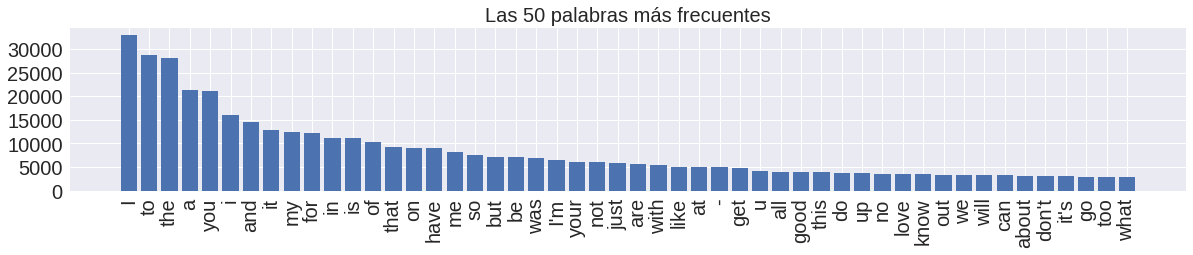

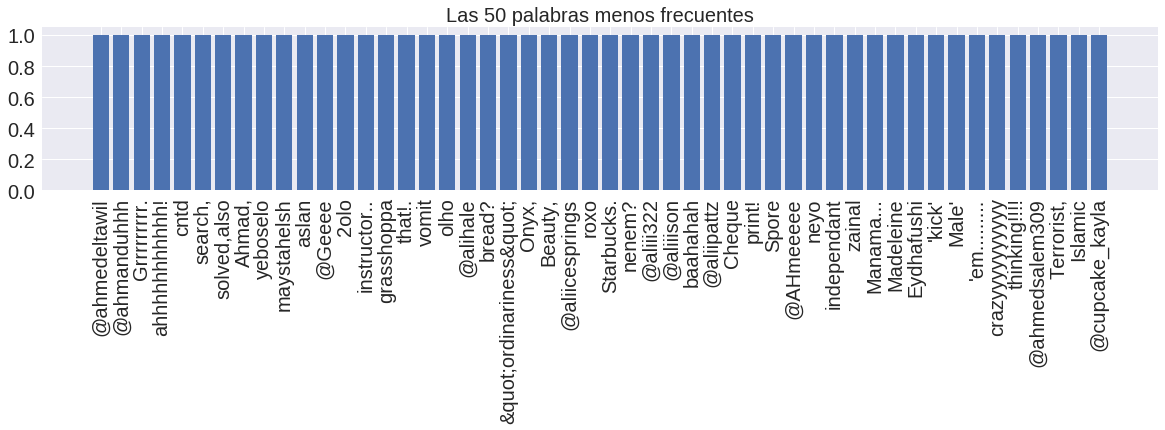

In [76]:
topn = 50

def plthist(dfsub, title="Distribución palabras"):
    plt.figure(figsize=(20,3))
    plt.bar(dfsub.index,dfsub["count"])
    plt.yticks(fontsize=20)
    plt.xticks(dfsub.index,dfsub["word"],rotation=90,fontsize=20)
    plt.title(title,fontsize=20)
    plt.show()

plthist(dfword.iloc[:topn,:], title="Las 50 palabras más frecuentes")
plthist(dfword.iloc[-topn:,:], title="Las 50 palabras menos frecuentes")

Vemos que entre las palabras más frecuentes se encuentran algunas stop words, que voy a proceder a eliminar. No las voy a eliminar todas, dejando 'not', 'no' y 'nor' obtengo un score ligeramente mejor. 

**Preprocesamiento:** 
* Quitar números
* Quitar puntuación
* Quitar espacios en blanco
* Quitar stop words
* Quitar nuestras propias stop words: Voy a eliminar las combinaciones de caracteres :-(, :-), :-/ :-| ya que he observado que no aportan valor porque aparecen clasificadas tanto en positivo como en negativo
* Usar expresiones regulares para eliminar referencias a usuarios: @nombre_usuario y direcciones web
* Reducir el vocabulario: lemmatizar  

**NOTA** Voy a cargar sólo 30000 filas del archivo train_sentiment.csv ya que al intentar cargarlas todas me daba el siguiente error al hacer el grid_searchMultiNB.fit:
```
OSError: [Errno 28] No space left on device
```

También lo intenté cargando la mitad de filas (50000) pero seguía dando el mismo error, así que para poder avanzar con la práctica he tirado con las 30000 filas.

In [126]:
stop_words.remove('no')
stop_words.remove('not')
stop_words.remove('nor')
len(stop_words)

171

In [0]:
import re

datos = []
mis_stop_words = [':-(', ':-)', ':-/',':-|',':o',';-','quot;','&quot','lt;']
re_usuario = re.compile(r'@')
re_direcciones = re.compile('https?://')
for index, row in train_df.iloc[0:30000].iterrows():
  if index > 0:
    label = row[1]
    doc = nlp(row[2].rstrip(), disable=['parser', 'tagger', 'ner'])
    text = ''
    for token in doc:
      if not token.is_digit and not token.is_quote and not token.is_punct and not token.is_space and token.lemma_ not in stop_words:
        if token.lemma_ != '-PRON-' and token.text not in mis_stop_words and not re_usuario.match(token.text) and not re_direcciones.match(token.text) and len(token.text)>1:
          text += token.lemma_ + ' '
    if (len(text)>0):
      datos.append((text.strip(), label))



**Observar el resultado:**
* Tamaño del vocabulario
* Media y Mediana
* Máxima longitud de la frase
* Palabras más frecuentes



In [128]:
vocabulary = []
longitudes = []
for txt in datos:
  for w in txt[0].split(' '):
    vocabulary.append(w)
  longitudes.append(len(txt[0].split(' ')))
print('Tamaño del vocabulario: %d' % len(set(vocabulary)))
print('Longitud media de las frases: %.2f' % np.mean(longitudes))
print('Mediana: %.2f' % np.median(longitudes))
print('Frase más larga: %.2f' % np.max(longitudes))


Tamaño del vocabulario: 37198
Longitud media de las frases: 7.72
Mediana: 7.00
Frase más larga: 69.00


Cuando llegue a la parte de deep learning no voy a tomar como tamaño máximo del vocabulario el tamaño más largo, acortaré las frases a longitud cuatro veces la media, ya que el tamaño máximo se aleja bastante de la media.

In [129]:
vocab_counter = Counter(vocabulary)
dfword = pd.DataFrame({"word":list(vocab_counter.keys()),"count":list(vocab_counter.values())})
dfword = dfword.sort_values("count",ascending=False)
dfword = dfword.reset_index()[["word","count"]]
dfword.head()

,word,count
0,not,6297
1,get,2790
2,go,2757
3,can,2372
4,will,1891


### 1.1. Implementación de un modelo de Sentiment Analysis con algún algoritmo de Machine Learning Clásico.  
Estamos ante un problema de clasificación binaria, voy a elegir el algoritmo de Naive Bayes.

In [0]:
split = split_train_val_test(datos)

In [0]:
pipelineMultiNB = Pipeline([
    ('vect', CountVectorizer()),    
    ('clf', MultinomialNB()), #MultinomialNB
])

In [0]:
parametersMultiNB = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__ngram_range': ((1, 2), (1, 3), (2, 3), (1,4)),  #ngrams to test
    'vect__analyzer': ('word', 'char', 'char_wb')
}

In [0]:
grid_searchMultiNB = GridSearchCV(pipelineMultiNB, parametersMultiNB, n_jobs=-1, verbose=1)

In [134]:
grid_searchMultiNB.fit(split['train'][0], split['train'][1])
best_parametersMultiNB = grid_searchMultiNB.best_estimator_.get_params()
for param_name in sorted(parametersMultiNB.keys()):
    print("\t%s: %r" % (param_name, best_parametersMultiNB[param_name]))
print("Best score: %0.3f" % grid_searchMultiNB.best_score_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  5.0min finished


	vect__analyzer: 'word'
	vect__max_df: 0.5
	vect__ngram_range: (1, 4)
Best score: 0.738


In [135]:
pipelineMultiNB.set_params(**best_parametersMultiNB)
predictionsMultiNB = pipelineMultiNB.score(split['test'][0], split['test'][1])
print('TEST SCORE: {}'.format(predictionsMultiNB))

TEST SCORE: 0.7508366800535475


### 1.2. Implementación de un modelo de Sentiment Analysis con alguna arquitectura de Deep Learning 
Voy a usar dos modelos: Deep Averaging Networks y CNN para texto, que son dos arquitecturas que dan muy buenos resultados para este tipo de problemas. Uso estos modelos para el problema de clasificación ya que tanto antes con el algoritmo de machine learning que usé como ahora, estoy asumiendo que cada variable de nuestro input es independiente.

In [0]:
from keras.layers import Input, Average, average, Lambda,Embedding, Flatten, Dense, Dropout
from keras.models import Model

from keras import backend as K

In [0]:
def mask_aware_mean(x):
    # recreate the masks - all zero rows have been masked
    mask = K.not_equal(K.sum(K.abs(x), axis=2, keepdims=True), 0)
    # number of that rows are not all zeros
    n = K.sum(K.cast(mask, 'float32'), axis=1, keepdims=False)
    # compute mask-aware mean of x
    x_mean = K.sum(x, axis=1, keepdims=False) / n
    return x_mean

def mask_aware_mean_output_shape(input_shape):
    shape = list(input_shape)
    assert len(shape) == 3
    return (shape[0], shape[2])

Para el caso de Deep Learning necesitamos algo más de **preprocesamiento**. Teníamos el vocabulario, la media de las frases y la longitud máxima. Como la longitud máxima se desvía bastante de la media, voy a quedarme sólo con las frases que no superen cuatro veces la media, para simplificar las cosas

In [138]:
media = np.mean(longitudes)
maxlen = int(media)*4
print(maxlen)

datos_filtrados = [(x, y) for x, y in datos if len(x) < maxlen]
len(datos), len(datos_filtrados)


28


(29878, 9016)

In [0]:
# construimos el vocabulario
w2id = {k:i for i, k in enumerate(vocab_counter)}
w2id['<UNK>'] = len(w2id)

In [0]:
def tokenizar_texto(texto):
  tokens = []
  for w in texto.split(' '):
    tokens.append(w)
  return tokens

In [0]:
# Preparar Input. Padding. Conversión a input
input_ready = []
vocab_counter = Counter(vocabulary)
for x, y in datos_filtrados:
    sentence = np.zeros((maxlen))    
    tokens = tokenizar_texto(x)
    y_binary = np.zeros(2)
    y_binary[y] = 1
    for i, t in enumerate(tokens):
      # las palabras que aparecen con una frecuencia menor a 5 las elimino
      sentence[i] = w2id[t] if t in vocab_counter and vocab_counter[t]>=5 else w2id['<UNK>']
    input_ready.append((sentence,y_binary))
    

In [142]:
splits = split_train_val_test(input_ready)
print(splits['train'][0].shape)
print(splits['train'][1].shape)
splits['train'][1]

(7212, 28)
(7212, 2)


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

#### Deep Averaging Network

In [143]:
input_layer = Input(shape=(maxlen,) )
embedding = Embedding(output_dim=100, input_dim=len(w2id), input_length=maxlen)(input_layer)
doc_representation = Lambda(mask_aware_mean, mask_aware_mean_output_shape, name='embedding_average')(embedding)
dense_1 = Dense(100, activation='relu')(doc_representation)
drop_1 = Dropout(0.5)(dense_1)
dense_2 = Dense(100, activation='relu')(drop_1)
drop_2 = Dropout(0.5)(dense_2)
out = Dense(2, activation='softmax')(drop_2)

model_avg_emb = Model(inputs=input_layer, outputs=out)

model_avg_emb.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model_avg_emb.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28)                0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 28, 100)           3719900   
_________________________________________________________________
embedding_average (Lambda)   (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
__________

In [144]:
model_avg_emb.fit(splits['train'][0], splits['train'][1],
          epochs=5,
          batch_size=16)

Epoch 1/5
7212/7212 [==============================] - 5s 689us/step - loss: 0.6857 - acc: 0.5488
Epoch 2/5
7212/7212 [==============================] - 5s 642us/step - loss: 0.5723 - acc: 0.7080
Epoch 3/5
7212/7212 [==============================] - 5s 640us/step - loss: 0.5062 - acc: 0.7542
Epoch 4/5
7212/7212 [==============================] - 5s 644us/step - loss: 0.4809 - acc: 0.7683
Epoch 5/5
2816/7212 [==========>...................] - ETA: 2s - loss: 0.4493 - acc: 0.7912

7212/7212 [==============================] - 5s 641us/step - loss: 0.4700 - acc: 0.7829


In [145]:
print(splits['test'][0].shape)
print(splits['test'][1].shape)
score_avg_emb = model_avg_emb.evaluate(splits['test'][0], splits['test'][1])
for label, value in zip(model_avg_emb.metrics_names, score_avg_emb):
  print(label + ': ' + str(value))

(1804, 28)
(1804, 2)
1804/1804 [==============================] - 0s 142us/step
loss: 0.5168084432835589
acc: 0.7455654100673955


####  Convolutional Neural Networks

In [146]:
from keras.layers import MaxPooling1D, GlobalMaxPooling1D
from keras.layers import Conv1D, Concatenate

embedding_dim = 100

input_layer = Input(shape=(maxlen,) )# maxlen
embedding = Embedding(output_dim=embedding_dim, input_dim=len(w2id), input_length=maxlen)(input_layer)#w2id maxlen

conv_1 = Conv1D(filters=50, kernel_size=1, strides=1, activation='relu', padding='valid')(embedding)
mp_1 = GlobalMaxPooling1D()(conv_1)

conv_2 = Conv1D(filters=50, kernel_size=2, strides=1, activation='relu', padding='valid')(embedding)
mp_2 = GlobalMaxPooling1D()(conv_2)

conv_5 = Conv1D(filters=50, kernel_size=5, strides=1, activation='relu', padding='valid')(embedding)
mp_5 = GlobalMaxPooling1D()(conv_5)

doc_representation = Concatenate()([mp_1, mp_2, mp_5])

dense_1 = Dense(100, activation='relu')(doc_representation)
drop_1 = Dropout(0.5)(dense_1)
dense_2 = Dense(100, activation='relu')(drop_1)
drop_2 = Dropout(0.5)(dense_2)
out = Dense(2, activation='softmax')(drop_2)

model_cnn = Model(inputs=input_layer, outputs=out)

model_cnn.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model_cnn.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 28)           0                                            
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, 28, 100)      3719900     input_2[0][0]                    
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 28, 50)       5050        embedding_4[0][0]                
__________________________________________________________________________________________________
conv1d_2 (Conv1D)               (None, 27, 50)       10050       embedding_4[0][0]                
__________________________________________________________________________________________________
conv1d_3 (

In [147]:
print(splits['train'][0].shape)
print(splits['train'][1].shape)
    

model_cnn.fit(splits['train'][0], splits['train'][1],
          epochs=100,
          batch_size=54)

(7212, 28)
(7212, 2)
Epoch 1/100
7212/7212 [==============================] - 3s 374us/step - loss: 0.6334 - acc: 0.6306
Epoch 2/100
7212/7212 [==============================] - 2s 260us/step - loss: 0.4796 - acc: 0.7765
Epoch 3/100
7212/7212 [==============================] - 2s 262us/step - loss: 0.4088 - acc: 0.8213
Epoch 4/100
7212/7212 [==============================] - 2s 261us/step - loss: 0.3502 - acc: 0.8534
Epoch 5/100
7212/7212 [==============================] - 2s 265us/step - loss: 0.2805 - acc: 0.8834
Epoch 6/100
7212/7212 [==============================] - 2s 263us/step - loss: 0.2152 - acc: 0.9158
Epoch 7/100
6318/7212 [=========================>....] - ETA: 0s - loss: 0.1708 - acc: 0.9285

7212/7212 [==============================] - 2s 261us/step - loss: 0.1727 - acc: 0.9271
Epoch 8/100
7212/7212 [==============================] - 2s 260us/step - loss: 0.1426 - acc: 0.9404
Epoch 9/100
7212/7212 [==============================] - 2s 261us/step - loss: 0.1199 - acc: 0.9479
Epoch 10/100
7212/7212 [==============================] - 2s 261us/step - loss: 0.1049 - acc: 0.9558
Epoch 11/100
7212/7212 [==============================] - 2s 263us/step - loss: 0.0996 - acc: 0.9541
Epoch 12/100
7212/7212 [==============================] - 2s 262us/step - loss: 0.0894 - acc: 0.9572
Epoch 13/100
7212/7212 [==============================] - 2s 260us/step - loss: 0.0835 - acc: 0.9608
Epoch 14/100
1566/7212 [=====>........................] - ETA: 1s - loss: 0.0769 - acc: 0.9591

7212/7212 [==============================] - 2s 261us/step - loss: 0.0803 - acc: 0.9630
Epoch 15/100
7212/7212 [==============================] - 2s 259us/step - loss: 0.0812 - acc: 0.9578
Epoch 16/100
7212/7212 [==============================] - 2s 263us/step - loss: 0.0782 - acc: 0.9598
Epoch 17/100
7212/7212 [==============================] - 2s 260us/step - loss: 0.0763 - acc: 0.9630
Epoch 18/100
7212/7212 [==============================] - 2s 260us/step - loss: 0.0719 - acc: 0.9652
Epoch 19/100
7212/7212 [==============================] - 2s 261us/step - loss: 0.0710 - acc: 0.9645
Epoch 20/100
7212/7212 [==============================] - 2s 262us/step - loss: 0.0757 - acc: 0.9656
Epoch 21/100
 702/7212 [=>............................] - ETA: 1s - loss: 0.0735 - acc: 0.9715

7212/7212 [==============================] - 2s 261us/step - loss: 0.0737 - acc: 0.9653
Epoch 22/100
7212/7212 [==============================] - 2s 262us/step - loss: 0.0681 - acc: 0.9648
Epoch 23/100
7212/7212 [==============================] - 2s 260us/step - loss: 0.0663 - acc: 0.9653
Epoch 24/100
7212/7212 [==============================] - 2s 261us/step - loss: 0.0666 - acc: 0.9670
Epoch 25/100
7212/7212 [==============================] - 2s 262us/step - loss: 0.0642 - acc: 0.9658
Epoch 26/100
7212/7212 [==============================] - 2s 262us/step - loss: 0.0685 - acc: 0.9639
Epoch 27/100
7212/7212 [==============================] - 2s 259us/step - loss: 0.0667 - acc: 0.9645
Epoch 28/100
 270/7212 [>.............................] - ETA: 1s - loss: 0.0505 - acc: 0.9593

7212/7212 [==============================] - 2s 260us/step - loss: 0.0693 - acc: 0.9634
Epoch 29/100
7212/7212 [==============================] - 2s 262us/step - loss: 0.0682 - acc: 0.9656
Epoch 30/100
7212/7212 [==============================] - 2s 260us/step - loss: 0.0705 - acc: 0.9652
Epoch 31/100
7212/7212 [==============================] - 2s 261us/step - loss: 0.0680 - acc: 0.9646
Epoch 32/100
7212/7212 [==============================] - 2s 262us/step - loss: 0.0638 - acc: 0.9653
Epoch 33/100
7212/7212 [==============================] - 2s 262us/step - loss: 0.0740 - acc: 0.9641
Epoch 34/100
7212/7212 [==============================] - 2s 262us/step - loss: 0.0787 - acc: 0.9642
Epoch 35/100
 486/7212 [=>............................] - ETA: 1s - loss: 0.0548 - acc: 0.9650

7212/7212 [==============================] - 2s 261us/step - loss: 0.0672 - acc: 0.9651
Epoch 36/100
7212/7212 [==============================] - 2s 263us/step - loss: 0.0665 - acc: 0.9652
Epoch 37/100
7212/7212 [==============================] - 2s 262us/step - loss: 0.0672 - acc: 0.9649
Epoch 38/100
7212/7212 [==============================] - 2s 262us/step - loss: 0.0694 - acc: 0.9662
Epoch 39/100
7212/7212 [==============================] - 2s 264us/step - loss: 0.0648 - acc: 0.9655
Epoch 40/100
7212/7212 [==============================] - 2s 263us/step - loss: 0.0706 - acc: 0.9655
Epoch 41/100
7212/7212 [==============================] - 2s 261us/step - loss: 0.0618 - acc: 0.9659
Epoch 42/100
 702/7212 [=>............................] - ETA: 1s - loss: 0.0379 - acc: 0.9801

7212/7212 [==============================] - 2s 260us/step - loss: 0.0668 - acc: 0.9646
Epoch 43/100
7212/7212 [==============================] - 2s 260us/step - loss: 0.0724 - acc: 0.9652
Epoch 44/100
7212/7212 [==============================] - 2s 258us/step - loss: 0.0691 - acc: 0.9662
Epoch 45/100
7212/7212 [==============================] - 2s 260us/step - loss: 0.0642 - acc: 0.9651
Epoch 46/100
7212/7212 [==============================] - 2s 261us/step - loss: 0.0633 - acc: 0.9655
Epoch 47/100
7212/7212 [==============================] - 2s 262us/step - loss: 0.0686 - acc: 0.9659
Epoch 48/100
7212/7212 [==============================] - 2s 261us/step - loss: 0.0680 - acc: 0.9646
Epoch 49/100
 702/7212 [=>............................] - ETA: 1s - loss: 0.0546 - acc: 0.9644

7212/7212 [==============================] - 2s 260us/step - loss: 0.0609 - acc: 0.9649
Epoch 50/100
7212/7212 [==============================] - 2s 260us/step - loss: 0.0632 - acc: 0.9648
Epoch 51/100
7212/7212 [==============================] - 2s 262us/step - loss: 0.0739 - acc: 0.9656
Epoch 52/100
7212/7212 [==============================] - 2s 265us/step - loss: 0.0717 - acc: 0.9644
Epoch 53/100
7212/7212 [==============================] - 2s 263us/step - loss: 0.0699 - acc: 0.9649
Epoch 54/100
7212/7212 [==============================] - 2s 262us/step - loss: 0.0683 - acc: 0.9649
Epoch 55/100
7212/7212 [==============================] - 2s 261us/step - loss: 0.0710 - acc: 0.9662
Epoch 56/100
 918/7212 [==>...........................] - ETA: 1s - loss: 0.0693 - acc: 0.9706

7212/7212 [==============================] - 2s 262us/step - loss: 0.0652 - acc: 0.9648
Epoch 57/100
7212/7212 [==============================] - 2s 261us/step - loss: 0.0739 - acc: 0.9653
Epoch 58/100
7212/7212 [==============================] - 2s 261us/step - loss: 0.0686 - acc: 0.9644
Epoch 59/100
7212/7212 [==============================] - 2s 259us/step - loss: 0.0661 - acc: 0.9684
Epoch 60/100
7212/7212 [==============================] - 2s 260us/step - loss: 0.0638 - acc: 0.9663
Epoch 61/100
7212/7212 [==============================] - 2s 263us/step - loss: 0.0647 - acc: 0.9664
Epoch 62/100
7212/7212 [==============================] - 2s 265us/step - loss: 0.0751 - acc: 0.9659
Epoch 63/100
 486/7212 [=>............................] - ETA: 1s - loss: 0.0723 - acc: 0.9753

7212/7212 [==============================] - 2s 262us/step - loss: 0.0706 - acc: 0.9662
Epoch 64/100
7212/7212 [==============================] - 2s 262us/step - loss: 0.0676 - acc: 0.9676
Epoch 65/100
7212/7212 [==============================] - 2s 261us/step - loss: 0.0638 - acc: 0.9667
Epoch 66/100
7212/7212 [==============================] - 2s 262us/step - loss: 0.0716 - acc: 0.9658
Epoch 67/100
7212/7212 [==============================] - 2s 263us/step - loss: 0.0696 - acc: 0.9664
Epoch 68/100
7212/7212 [==============================] - 2s 264us/step - loss: 0.0631 - acc: 0.9670
Epoch 69/100
7212/7212 [==============================] - 2s 261us/step - loss: 0.0635 - acc: 0.9674
Epoch 70/100
 918/7212 [==>...........................] - ETA: 1s - loss: 0.0575 - acc: 0.9651

7212/7212 [==============================] - 2s 260us/step - loss: 0.0712 - acc: 0.9671
Epoch 71/100
7212/7212 [==============================] - 2s 261us/step - loss: 0.0616 - acc: 0.9667
Epoch 72/100
7212/7212 [==============================] - 2s 265us/step - loss: 0.0711 - acc: 0.9646
Epoch 73/100
7212/7212 [==============================] - 2s 262us/step - loss: 0.0666 - acc: 0.9651
Epoch 74/100
7212/7212 [==============================] - 2s 260us/step - loss: 0.0639 - acc: 0.9671
Epoch 75/100
7212/7212 [==============================] - 2s 263us/step - loss: 0.0645 - acc: 0.9651
Epoch 76/100
7212/7212 [==============================] - 2s 261us/step - loss: 0.0622 - acc: 0.9666
Epoch 77/100
 486/7212 [=>............................] - ETA: 1s - loss: 0.0458 - acc: 0.9733

7212/7212 [==============================] - 2s 261us/step - loss: 0.0639 - acc: 0.9670
Epoch 78/100
7212/7212 [==============================] - 2s 263us/step - loss: 0.0630 - acc: 0.9666
Epoch 79/100
7212/7212 [==============================] - 2s 264us/step - loss: 0.0680 - acc: 0.9660
Epoch 80/100
7212/7212 [==============================] - 2s 264us/step - loss: 0.0683 - acc: 0.9669
Epoch 81/100
7212/7212 [==============================] - 2s 265us/step - loss: 0.0743 - acc: 0.9660
Epoch 82/100
7212/7212 [==============================] - 2s 265us/step - loss: 0.0670 - acc: 0.9646
Epoch 83/100
7212/7212 [==============================] - 2s 262us/step - loss: 0.0639 - acc: 0.9676
Epoch 84/100
 702/7212 [=>............................] - ETA: 1s - loss: 0.0758 - acc: 0.9615

7212/7212 [==============================] - 2s 264us/step - loss: 0.0600 - acc: 0.9673
Epoch 85/100
7212/7212 [==============================] - 2s 262us/step - loss: 0.0638 - acc: 0.9644
Epoch 86/100
7212/7212 [==============================] - 2s 263us/step - loss: 0.0672 - acc: 0.9656
Epoch 87/100
7212/7212 [==============================] - 2s 263us/step - loss: 0.0582 - acc: 0.9671
Epoch 88/100
7212/7212 [==============================] - 2s 260us/step - loss: 0.0596 - acc: 0.9671
Epoch 89/100
7212/7212 [==============================] - 2s 263us/step - loss: 0.0612 - acc: 0.9680
Epoch 90/100
7212/7212 [==============================] - 2s 259us/step - loss: 0.0719 - acc: 0.9667
Epoch 91/100
 918/7212 [==>...........................] - ETA: 1s - loss: 0.0429 - acc: 0.9793

7212/7212 [==============================] - 2s 259us/step - loss: 0.0592 - acc: 0.9678
Epoch 92/100
7212/7212 [==============================] - 2s 261us/step - loss: 0.0674 - acc: 0.9656
Epoch 93/100
7212/7212 [==============================] - 2s 258us/step - loss: 0.0599 - acc: 0.9669
Epoch 94/100
7212/7212 [==============================] - 2s 261us/step - loss: 0.0642 - acc: 0.9670
Epoch 95/100
7212/7212 [==============================] - 2s 260us/step - loss: 0.0651 - acc: 0.9658
Epoch 96/100
7212/7212 [==============================] - 2s 262us/step - loss: 0.0611 - acc: 0.9670
Epoch 97/100
7212/7212 [==============================] - 2s 263us/step - loss: 0.0674 - acc: 0.9660
Epoch 98/100
 918/7212 [==>...........................] - ETA: 1s - loss: 0.0606 - acc: 0.9749

7212/7212 [==============================] - 2s 262us/step - loss: 0.0650 - acc: 0.9667
Epoch 99/100
7212/7212 [==============================] - 2s 261us/step - loss: 0.0624 - acc: 0.9663
Epoch 100/100
7212/7212 [==============================] - 2s 260us/step - loss: 0.0634 - acc: 0.9660


In [148]:
score_cnn = model_cnn.evaluate(splits['test'][0], splits['test'][1], batch_size=64)

1804/1804 [==============================] - 0s 140us/step


In [149]:
for label, value in zip(model_cnn.metrics_names, score_cnn):
  print(label + ': ' + str(value))

loss: 2.077726565020576
acc: 0.7317073172053318


## 1.3 Breve explicación de los resultados:
Los resultados obtenidos son los siguientes:
```

Machine Learning(Naive Bayes): TEST SCORE: 0.7508366800535475
DeepLearning (DAN):
      loss: 0.5168084432835589
      acc: 0.7455654100673955
DeepLearning (CNN):
      loss: 2.077726565020576
      acc: 0.7317073172053318
      
```
He obtenido mejor score con el algoritmo de machine learning que con el resto. También se puede ver que el modelo DAN, que es bastante sencillo, da muy buen resultado.   
A partir de aquí podemos intentar mejorar de varias formas. Por un lado, en el preprocesado de los tweets, limpiando mejor los textos, intentando varias combinaciones (probar a quitar unas palabras y luego otras, etc...) Por otro lado, en la parte de Machine Learning jugando con los parámetros del Pipeline e investigando distintas combinaciones. En la parte de Deep Learning podemos jugar con las capas del modelo e intentar también ajustar los parámetros (batch_size, epochs, dimensión de las hidden_layers...etc). Yo he echo alguna prueba sin detenerme demasiado por falta de tiempo, con resultados muy similares a los que he dejado reflejados.



# 2. Tweet Analysis:
Que temas aparecen? Como se representan estos temas? De que hablan unos y otros?

## Dataset: 
Como comenté antes, usaré el archivo dataset2.json para los siguientes apartados de la práctica. Voy a proceder a cargarlo y a hacer una pequeña exploración inicial.

In [154]:
from google.colab import files
import io

# cargar

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


train_df2 = pd.read_json(io.StringIO(uploaded['dataset2.json'].decode('utf-8')))
train_df2.head()

Saving dataset2.json to dataset2.json
User uploaded file "dataset2.json" with length 1070528 bytes


,0,1,10,100,1000,1001,1002,1003,1004,1005,...,990,991,992,993,994,995,996,997,998,999
label,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA,...,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA
tweet,"“Low plastic stool, cheap but delicious noodle...","“Low plastic stool, cheap but delicious noodle...",Michelle and I are so inspired by all the youn...,Senate leaders' obstruction of our Supreme Cou...,"In 31 states, people can still be fired becaus...","Seven down, one more to go. Make sure you tune...",Have you entered yet? You and a friend could w...,Check out five big victories that made 2015 a ...,Suit up—it's President Obama's final State of ...,You can still join the team fighting for progr...,...,You don't want to miss this. Say you'll tune i...,LAST CALL: You could be going on a seven-day c...,Thinking of ways you can help out over the nex...,DEADLINE: Chip in to help fund the fight for m...,You and a friend could be heading north. Enter...,TONIGHT: Come in with the clutch contribution ...,Global climate action became a reality this ye...,Chip in to help gear up for the big fights in ...,Here's your chance to get lost in the beauty o...,Get ready—the deadline to pitch in before the ...


In [155]:
train_df2 = pd.read_json('dataset2.json', encoding='utf8')
train_df2.head()

,0,1,10,100,1000,1001,1002,1003,1004,1005,...,990,991,992,993,994,995,996,997,998,999
label,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA,...,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA,OBAMA
tweet,"“Low plastic stool, cheap but delicious noodle...","“Low plastic stool, cheap but delicious noodle...",Michelle and I are so inspired by all the youn...,Senate leaders' obstruction of our Supreme Cou...,"In 31 states, people can still be fired becaus...","Seven down, one more to go. Make sure you tune...",Have you entered yet? You and a friend could w...,Check out five big victories that made 2015 a ...,Suit up—it's President Obama's final State of ...,You can still join the team fighting for progr...,...,You don't want to miss this. Say you'll tune i...,LAST CALL: You could be going on a seven-day c...,Thinking of ways you can help out over the nex...,DEADLINE: Chip in to help fund the fight for m...,You and a friend could be heading north. Enter...,TONIGHT: Come in with the clutch contribution ...,Global climate action became a reality this ye...,Chip in to help gear up for the big fights in ...,Here's your chance to get lost in the beauty o...,Get ready—the deadline to pitch in before the ...


In [156]:
print(train_df2.shape)
train_df2 = train_df2.T
train_df2.tail()

(2, 5889)


,label,tweet
995,OBAMA,TONIGHT: Come in with the clutch contribution ...
996,OBAMA,Global climate action became a reality this ye...
997,OBAMA,Chip in to help gear up for the big fights in ...
998,OBAMA,Here's your chance to get lost in the beauty o...
999,OBAMA,Get ready—the deadline to pitch in before the ...


In [157]:
train_df2.label.unique()

array(['OBAMA', 'TRUMP'], dtype=object)

In [158]:
print('Hay {} tweets de Obama y {} tweets de Trump'.format(train_df2.loc[train_df2['label'] == 'OBAMA'].shape[0],train_df2.loc[train_df2['label'] == 'TRUMP'].shape[0]))

Hay 2894 tweets de Obama y 2995 tweets de Trump


Volvemos a ver que tenemos las muestras balanceadas.

In [159]:
dfword2 = df_word(train_df2['tweet'])
dfword2.head(10)

Tamaño del vocabulario: 21616


,word,count
0,the,5156
1,to,3880
2,and,2626
3,of,2273
4,a,1908
5,in,1844
6,is,1798
7,for,1420
8,on,1151
9,Obama,1056


 
**Preprocesamiento**

In [160]:
# añado de nuevo las stop_words que quité para el ejercicio anterior
stop_words.append('no')
stop_words.append('not')
stop_words.append('nor')
len(stop_words)

174

In [0]:
tweets = []
mis_stop_words = ['|','amp']
for index, row in train_df2.iterrows():
  doc = nlp(row[1].rstrip(), disable=['parser', 'tagger', 'ner'])
  tweet = []
  for token in doc:
    if not token.is_digit and not token.is_quote and not token.is_bracket and not token.is_punct and not token.is_space and token.lemma_ not in stop_words and not token.text in mis_stop_words:
      tweet.append((token.text.strip()))
  tweets.append(tweet)

In [162]:
len(tweets)

5889

In [163]:
vocab = set([t for doc in tweets for t in doc])
w2id = {k:i for  i,k in enumerate(vocab)}
id2w = {i:k for k, i in w2id.items()}
print('{} unique tokens'.format(len(w2id)))

14102 unique tokens


**Gensim:** Voy a usar esta librería de python para hacer el análisis de los tweets

In [164]:
!pip install gensim
!pip install pyLDAvis

    100% |████████████████████████████████| 23.5MB 1.7MB/s 
    100% |████████████████████████████████| 1.4MB 13.5MB/s 
    100% |████████████████████████████████| 133kB 22.7MB/s 
    100% |████████████████████████████████| 4.4MB 8.8MB/s 
    100% |████████████████████████████████| 61kB 20.4MB/s 
    100% |████████████████████████████████| 552kB 17.5MB/s 
  Running setup.py bdist_wheel for smart-open ... - \ done
  Stored in directory: /content/.cache/pip/wheels/73/f1/9b/ccf93d4ba073b6f79b1ed9df68ab5ce048d8136d0efcf90b30
  Running setup.py bdist_wheel for bz2file ... - done
  Stored in directory: /content/.cache/pip/wheels/81/75/d6/e1317bf09bf1af5a30befc2a007869fa6e1f516b8f7c591cb9
Successfully built smart-open bz2file
    27% |█████████                       | 450kB 10.3MB/s eta 0:00:01

    100% |████████████████████████████████| 1.6MB 10.2MB/s 
    100% |████████████████████████████████| 266kB 14.0MB/s 
    100% |████████████████████████████████| 163kB 15.8MB/s 
    100% |████████████████████████████████| 204kB 14.2MB/s 
    100% |████████████████████████████████| 51kB 18.7MB/s 
  Running setup.py bdist_wheel for pyLDAvis ... - \ done
  Stored in directory: /content/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [0]:
import gensim
from gensim.corpora import Dictionary
import pyLDAvis.gensim
import warnings
warnings.filterwarnings('ignore')

In [166]:
gensim_dict = Dictionary(tweets)
len(gensim_dict)

14102

In [0]:
corpus = [gensim_dict.doc2bow(doc) for doc in tweets]

In [168]:
len(tweets), len(corpus)

(5889, 5889)

In [169]:
from gensim import corpora, models, similarities
from math import exp

lda_big = models.LdaModel(corpus, id2word=gensim_dict, num_topics=50, iterations=5, passes=20, alpha='auto')
print(exp(lda_big.log_perplexity(corpus)))

0.00016980471129147447


In [170]:
lda_med = models.LdaModel(corpus, id2word=gensim_dict, num_topics=25, iterations=5, passes=20, alpha='auto')
print(exp(lda_med.log_perplexity(corpus)))

0.00019096455014625918


In [172]:
lda_small = models.LdaModel(corpus, id2word=gensim_dict, num_topics=10, iterations=5, passes=20, alpha='auto')
print(exp(lda_small.log_perplexity(corpus)))

0.00021834603734294307


A simple vista observando los valores de la perplejidad, me quedo con el modelo que divide en 50 topics, que parece a priori la mejor opción de las tres.

In [173]:
vis = pyLDAvis.gensim.prepare(lda_big, corpus, gensim_dict)
pyLDAvis.display(vis)

Tampoco es que obtengamos nada espectacular, hay muchas clases que se superponen... a lo mejor se podrían obtener mejores resultados haciendo un mejor preprocesado de datos. Voy a usar el módulo CoherenceModel para ver cuál sería el número óptimo de topics.

In [0]:
from gensim.models import CoherenceModel
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = models.LdaModel(corpus, id2word=dictionary, num_topics=num_topics, iterations=5, passes=20, alpha='auto')
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

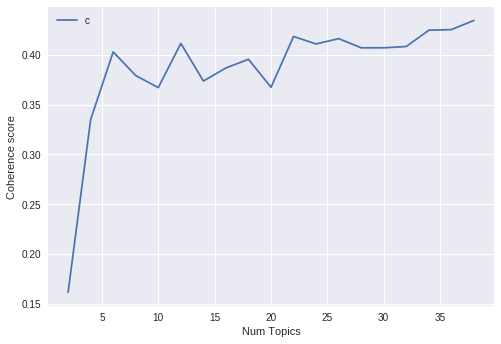

In [161]:
limit=40; start=2; step=2;
model_list, coherence_values = compute_coherence_values(dictionary=gensim_dict, corpus=corpus, texts=tweets, start=start, limit=limit, step=step)
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

Con la gráfica podemos observar que la tendencia es alcista, es decir, si siguiéramos explorando más allá de los 40 topics hay posibilidades de seguir mejorando, lo cual es coherente con los resultados que tuvimos de la perplejidad. Voy a quedarme con Num Topics = 22, a ver qué resultados obtengo.

In [163]:
lda_22 = models.LdaModel(corpus, id2word=gensim_dict, num_topics=22, iterations=5, passes=20, alpha='auto')
print(exp(lda_22.log_perplexity(corpus)))

0.00026981531042596696


In [164]:
vis = pyLDAvis.gensim.prepare(lda_22, corpus, gensim_dict)
pyLDAvis.display(vis)

Bueno, tenemos algunos topics que se superponen, nada espectacular la verdad.  
Si miramos el Top-30 de los términos, vemos que se está hablando de los ataques terroristas de Londres (aparece attack, Prime, Minister, May), de la injerencia rusa en las elecciones que dieron como ganador a Trump, y de la salida de EEUU del acuerdo sobre el cambio climático.   
Aunque los resultados no son muy buenos, podemos ver algunos topics bastante diferenciados. Por ejemplo, en el topic 1, se habla de la posible injerencia rusa en las elecciones que dieron como ganador a Trump. En el topic 3 se habla sobre el cambio climático. En el topic 12 podemos ver que se habla de los ataques terroristas de Londres y del obamacare.  

**Voy a hacer ahora un estudio por separado de los tweets de Obama y de los de Trump, para contestar a la pregunta 'De qué hablan unos y otros?'**

In [0]:
tweets_obama = []
tweets_trump = []
mis_stop_words = ['|','amp']
for index, row in train_df2.iterrows():
  doc = nlp(row[1].rstrip(), disable=['parser', 'tagger', 'ner'])
  tweet = []
  for token in doc:
      if token.text not in mis_stop_words and len(token.text)>1:
        tweet.append((token.text.strip()))
  if row[0]=='OBAMA':
    tweets_obama.append(tweet)
  else:
    tweets_trump.append(tweet)

In [178]:
len(tweets_obama), len(tweets_trump)

(2894, 2995)

In [179]:
vocab_obama = set([t for doc in tweets_obama for t in doc])
w2id_obama = {k:i for  i,k in enumerate(vocab_obama)}
id2w_obama = {i:k for k, i in w2id_obama.items()}
print('{} tokens únicos de Obama'.format(len(w2id_obama)))

7194 tokens únicos de Obama


In [180]:
vocab_trump = set([t for doc in tweets_trump for t in doc])
w2id_trump = {k:i for  i,k in enumerate(vocab_trump)}
id2w_trump = {i:k for k, i in w2id_trump.items()}
print('{} tokens únicos de Trump'.format(len(w2id_trump)))

9699 tokens únicos de Trump


In [181]:
gensim_dict_obama = Dictionary(tweets_obama)
len(gensim_dict_obama)

7194

In [182]:
gensim_dict_trump = Dictionary(tweets_trump)
len(gensim_dict_trump)

9699

In [183]:
corpus_obama = [gensim_dict_obama.doc2bow(doc) for doc in tweets_obama]
corpus_trump = [gensim_dict_trump.doc2bow(doc) for doc in tweets_trump]
print(len(tweets_obama), len(corpus_obama))
print(len(tweets_trump), len(corpus_trump))

2894 2894
2995 2995


In [184]:
len(corpus_obama), len(gensim_dict_obama)

(2894, 7194)

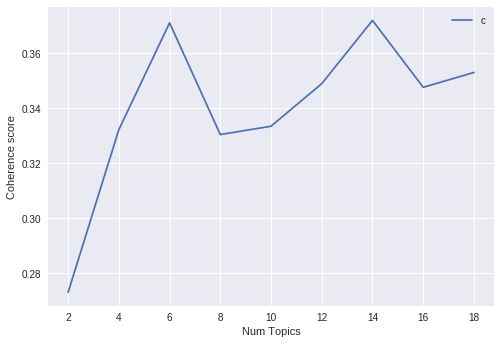

In [219]:
limit=20; start=2; step=2;
model_list, coherence_values = compute_coherence_values(dictionary=gensim_dict_obama, corpus=corpus_obama, texts=tweets_obama, start=start, limit=limit, step=step)
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

Para ver de qué habla Obama voy a elegir 6 topics.

In [185]:
lda_obama = models.LdaModel(corpus_obama, id2word=gensim_dict_obama, num_topics=6, iterations=5, passes=20, alpha='auto')
print(exp(lda_obama.log_perplexity(corpus_obama)))

0.0007188453174905941


In [186]:
vis = pyLDAvis.gensim.prepare(lda_obama, corpus_obama, gensim_dict_obama)
pyLDAvis.display(vis)

Si observamos el top 30 de los términos más frecuentes, vemos que Obama habla del Senado, las Cortes Supremas, sobre salud, economía... Hay topics sobre el cambio climático, el obama care...

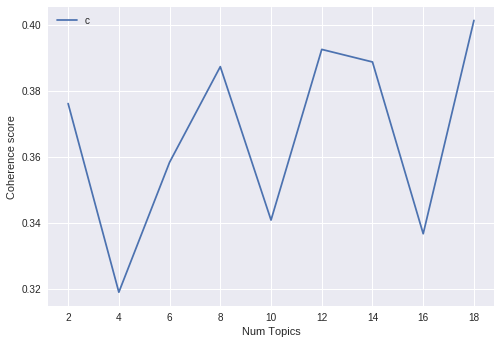

In [222]:
limit=20; start=2; step=2;
model_list, coherence_values = compute_coherence_values(dictionary=gensim_dict_trump, corpus=corpus_trump, texts=tweets_trump, start=start, limit=limit, step=step)
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

A la vista de los resultados, me voy a quedar en este caso en 18 topics.

In [189]:
lda_trump = models.LdaModel(corpus_trump, id2word=gensim_dict_trump, num_topics=18, iterations=5, passes=20, alpha='auto')
print(exp(lda_trump.log_perplexity(corpus_trump)))

0.0005101901022117206


In [190]:
vis = pyLDAvis.gensim.prepare(lda_trump, corpus_trump, gensim_dict_trump)
pyLDAvis.display(vis)

Si observamos los términos más frecuentes, vemos que Trump habla de los ataques terroristas en Londres y de las fake news. Por topics, el 17 parece hablar de algún discurso por las palabras BLESS, GOD... El 8 parece que habla claramente de los ataques terroristas de Londres.

# Tweet Generation.

Escoged a uno de los dos presidentes, y escribid tweets como ellos, usando un Modelo Generativo:  
Voy a escoger a Trump, por eso de que puede ser más divertido lo que diga :-)

### Helper functions


In [0]:
from keras.models import Model, Sequential
from keras.layers import Input, CuDNNLSTM, Dense, LSTM
from keras.layers import Bidirectional
from keras.layers import Embedding
from keras.layers import Merge, Dot, Concatenate, Flatten, Permute, Multiply, dot, concatenate
from keras.layers import TimeDistributed
from keras.layers import Activation
from keras.preprocessing import sequence
from keras.callbacks import Callback
from keras.optimizers import SGD
from keras.models import load_model
from random import shuffle, choice, sample
from copy import copy

from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [0]:
def sample_pred(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)
  
class Sampletest(Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % SAMPLE_EVERY == 0  and epoch>0:
            data_test = []
            nb_samples = 1
            
            params = {
                'maxlen': maxlen,
                'vocab': nb_vocab,
                'use_embeddings': True
                }
            for _ in range(nb_samples):
                data_test = choice(init_chars)
                for diversity in [0.2, 0.6, 1.2]:
                    print('----- diversity:', diversity)
                    sentence = copy(data_test)
                    generated = copy(data_test)
                    for i in range(len(data_test), 400):
                        x_pred = np.zeros((1, params['maxlen']))
                        for t, char in enumerate(sentence):
                            x_pred[0, t] = w2id[char] if char in w2id else w2id['<UNK>']
                        preds = self.model.predict(x_pred, verbose=0)[0]
                        next_index = sample_pred(preds, diversity)
                        next_char = id2w[next_index]
                        if next_char == '<EOS>':
                            break
                        generated += [next_char]
                        sentence = sentence[1:] 
                        sentence += [next_char]
                    print(''.join(generated))
                    
class HistoryDisplay(Callback):
    
    def on_train_begin(self, logs={}):
        self.losses = []
        self.accs = []
        self.epochs = []
        self.fig, self.ax = plt.subplots()
        #plt.show()
        
        plt.ion()
        self.fig.show()
        self.fig.canvas.draw()
    
    def on_epoch_end(self, epoch, logs):
        self.epochs.append(epoch)
        self.losses.append(logs['loss'])
        self.accs.append(logs['acc'])
        if epoch % PLOT_EVERY == 0:
            
            self.ax.clear()
            self.ax.plot(self.epochs, self.accs, 'g', label='acc')
            self.ax.plot(self.epochs, self.losses, 'b', label='loss')
            legend = self.ax.legend(loc='upper right', shadow=True, fontsize='x-large')
            #display.clear_output(wait=True)
            #display.display(pl.gcf())
            self.fig.canvas.draw()
            
            #plt.draw()
            
class TimeHistory(Callback):
  def on_train_begin(self, logs={}):
      self.times = []

  def on_epoch_begin(self, batch, logs={}):
      self.epoch_time_start = time.time()

  def on_epoch_end(self, batch, logs={}):
      self.times.append(time.time() - self.epoch_time_start)

**Preparar los datos**

In [33]:
trump_dataset = []
for index, row in train_df2.iterrows():
    sentence = row[1]
    if row[0] == 'TRUMP':
      trump_dataset.append(sentence)
print(trump_dataset[0])
len(trump_dataset)

My thoughts and prayers are with the families of our serviceman who was killed and his fellow servicemen who were wounded in Somalia. They are truly all HEROES.


2995

In [0]:
#obtenemos los caracteres
tokenized = [list(x) for x in trump_dataset]

In [0]:
init_chars = [x[:5] for x in tokenized]
for i in range(len(init_chars)):
    tmp = init_chars[i]
    tmp.insert(0, '<SOS>')
    init_chars[i] = tmp[:5]

In [36]:
start_token = [s[1] for s in tokenized if len(s) > 1]
len(start_token)

2995

In [37]:
maxlen = max([len(x) for x in tokenized])
avglen = sum([len(x) for x in tokenized])/len(tokenized)
print(maxlen, avglen)

320 160.39098497495826


In [38]:
vocab = [t for s in trump_dataset for t in s]
print('num tokens: {}'.format(len(vocab)))

num tokens: 480371


In [39]:
vocab_counter = Counter(vocab)
vocab = [w for w, v in vocab_counter.items() if v>2]
vocab = ['<PAD>', '<UNK>', '<SOS>', '<EOS>'] + vocab
nb_vocab = len(vocab)

'num features a usar {}'.format(nb_vocab)

'num features a usar 111'

In [0]:
w2id = {k:i for i, k in enumerate(vocab)}
id2w = {i:k for k, i in w2id.items()}

In [41]:
# generacion dataset
maxlen = min(maxlen, 5)

step = 1

data_train = []

for x in tokenized:
    x.insert(0, '<SOS>')
    x.append('<EOS>')
    for i in range(0, len(x)-maxlen, step):
        data_train.append((x[i:i+maxlen], x[i+maxlen]))
        
print('nb_sequences: {}'.format(len(data_train)))

nb_sequences: 471386


**Decidir la arquitectura y preprara el modelo**  
Voy a usar RNN

In [0]:
class LM:
    def __init__(self, **kwargs):
        self.params = kwargs.pop('params', None)
    
    def compile_bidirectional(self, params={}):
        
        lm_inputs = Input(shape=(params['maxlen'], ), name='lm_input')
        
        embeddings = Embedding(params['vocab'], params['emb_feats'])(lm_inputs)
        
        lstm =  CuDNNLSTM(params['rnn_hidden'], return_sequences=True, name='rnn1')        
        
        lmlstm = Bidirectional(lstm)(embeddings)       
        
        stacklstm =  CuDNNLSTM(params['rnn_hidden'], return_sequences=False, name='stacked')
        
        stackedlstm = stacklstm(lmlstm)
        
        lmout = Dense(params['vocab'], activation='softmax')(stackedlstm)
        
        model = Model(lm_inputs, lmout)
        
        model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
        
        model.summary()
        
        return model
        
    def train(self, model, data, params={}):
        
        callbacks = self._get_callbacks()
        
        if 'shuffle' in params and params['shuffle']:
            shuffle(data)
            
        sentences, next_chars = zip(*data)
        print(sentences[0])
        x = np.zeros((len(data), params['maxlen']))
        y = np.zeros((len(data), params['vocab']))
        for i, sentence in enumerate(sentences):
            for t, char in enumerate(sentence):
                x[i, t] = w2id[char] if char in w2id else w2id['<UNK>']
            y[i, w2id[next_chars[i]] if next_chars[i] in w2id else w2id['<UNK>']]  = 1
        
        model.fit(x, y, batch_size=params['batch_size'], epochs=params['epochs'], callbacks=callbacks, verbose=1)

    def predict(self, model, data, params={}):        
        if 'use_embeddings' in params and params['use_embeddings']:
            # variedad en las predicciones
            for diversity in [0.2, 0.6, 1.2]:
                print('----- diversity:', diversity)
                sentence = copy(data)
                generated = copy(data)
                # cuantas predicciones queremos hacer
                for i in range(len(data), 400):
                    x_pred = np.zeros((1, params['maxlen']))
                    # preparar inpunt
                    for t, char in enumerate(sentence):
                        x_pred[0, t] = w2id[char] if char in w2id else w2id['<UNK>']
                    # predecir
                    preds = self.model.predict(x_pred, verbose=0)[0]
                    next_index = sample_pred(preds, diversity)
                    next_char = id2w[next_index]
                    # mirar si hemos terminado
                    if next_char == '<EOS>':
                        break
                    # ana                        
                    generated += [next_char]
                    sentence = sentence[1:] 
                    sentence += [next_char]
                print(''.join(generated))
    
    
    def load(self, model_path='seq2seq_attn.h5'):
        return load_model(model_path)
    
    def _get_callbacks(self, model_path='seq2seq_attn.h5'):
        
        
        es = EarlyStopping(monitor='loss', patience=4, mode='auto', verbose=0)       
        
        save_best = ModelCheckpoint(model_path, monitor='loss', verbose = 0, save_best_only=True, save_weights_only=False, period=2)
        st = Sampletest()
        # hd = HistoryDisplay()
        rlr = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=3, min_lr=0.0001, verbose=1)
        return [st, rlr]

**Hiperparámetros**

In [0]:
SAMPLE_EVERY = 50
compile_params = {
    'maxlen': maxlen, 
    'vocab': len(vocab),
    'emb_feats': 100,
    'rnn_hidden': 256,
}
LOAD_MODEL = False
bTrain = True

In [44]:
maxlen, len(vocab)

(5, 111)

**Compilar**

In [45]:
lm = LM()
if LOAD_MODEL:
    path = 'final_{}.h5'.format(dtype)
    lm_model = lm.load(model_path=path)
    lm_model.summary()
else:
    lm_model = lm.compile_bidirectional(params=compile_params) 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lm_input (InputLayer)        (None, 5)                 0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 5, 100)            11100     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 5, 512)            733184    
_________________________________________________________________
stacked (CuDNNLSTM)          (None, 256)               788480    
_________________________________________________________________
dense_2 (Dense)              (None, 111)               28527     
Total params: 1,561,291
Trainable params: 1,561,291
Non-trainable params: 0
_________________________________________________________________


**Entrenar**

In [46]:
train_params = {
    'epochs': 250,
    'batch_size': 256,
    'shuffle': True,
    'vocab': nb_vocab,
    'maxlen': maxlen,
    'use_embeddings': True
}
if bTrain:
    lm.train(model=lm_model, data=data_train, params=train_params)

[' ', 'u', 's', 'e', 'd']
Epoch 1/250
471386/471386 [==============================] - 38s 80us/step - loss: 2.3253 - acc: 0.3731
Epoch 2/250
 77824/471386 [===>..........................] - ETA: 30s - loss: 1.8628 - acc: 0.4960

471386/471386 [==============================] - 37s 78us/step - loss: 1.7352 - acc: 0.5300
Epoch 3/250
224512/471386 [=============>................] - ETA: 19s - loss: 1.5591 - acc: 0.5738

471386/471386 [==============================] - 37s 78us/step - loss: 1.5389 - acc: 0.5800
Epoch 4/250
291328/471386 [=================>............] - ETA: 14s - loss: 1.4417 - acc: 0.6028

471386/471386 [==============================] - 37s 78us/step - loss: 1.4375 - acc: 0.6045
Epoch 5/250
321792/471386 [===================>..........] - ETA: 11s - loss: 1.3714 - acc: 0.6194

471386/471386 [==============================] - 37s 78us/step - loss: 1.3713 - acc: 0.6197
Epoch 6/250
335104/471386 [====================>.........] - ETA: 10s - loss: 1.3214 - acc: 0.6305

471386/471386 [==============================] - 37s 78us/step - loss: 1.3224 - acc: 0.6305
Epoch 7/250
342016/471386 [====================>.........] - ETA: 10s - loss: 1.2779 - acc: 0.6408

471386/471386 [==============================] - 37s 78us/step - loss: 1.2823 - acc: 0.6399
Epoch 8/250
345088/471386 [====================>.........] - ETA: 9s - loss: 1.2451 - acc: 0.6476

471386/471386 [==============================] - 37s 78us/step - loss: 1.2484 - acc: 0.6471
Epoch 9/250
345856/471386 [=====================>........] - ETA: 9s - loss: 1.2158 - acc: 0.6540

471386/471386 [==============================] - 37s 78us/step - loss: 1.2195 - acc: 0.6536
Epoch 10/250
345088/471386 [====================>.........] - ETA: 9s - loss: 1.1855 - acc: 0.6613

471386/471386 [==============================] - 37s 78us/step - loss: 1.1926 - acc: 0.6592
Epoch 11/250
344320/471386 [====================>.........] - ETA: 9s - loss: 1.1626 - acc: 0.6657 

471386/471386 [==============================] - 37s 78us/step - loss: 1.1692 - acc: 0.6636
Epoch 12/250
344320/471386 [====================>.........] - ETA: 9s - loss: 1.1424 - acc: 0.6694

471386/471386 [==============================] - 37s 78us/step - loss: 1.1472 - acc: 0.6684
Epoch 13/250
344320/471386 [====================>.........] - ETA: 9s - loss: 1.1229 - acc: 0.6734

471386/471386 [==============================] - 37s 78us/step - loss: 1.1275 - acc: 0.6719
Epoch 14/250
344064/471386 [====================>.........] - ETA: 9s - loss: 1.1047 - acc: 0.6778 

471386/471386 [==============================] - 37s 78us/step - loss: 1.1092 - acc: 0.6768
Epoch 15/250
343552/471386 [====================>.........] - ETA: 10s - loss: 1.0849 - acc: 0.6811

471386/471386 [==============================] - 37s 79us/step - loss: 1.0918 - acc: 0.6798
Epoch 16/250
343552/471386 [====================>.........] - ETA: 9s - loss: 1.0687 - acc: 0.6858 

471386/471386 [==============================] - 37s 78us/step - loss: 1.0755 - acc: 0.6841
Epoch 17/250
343552/471386 [====================>.........] - ETA: 9s - loss: 1.0547 - acc: 0.6878 

471386/471386 [==============================] - 37s 78us/step - loss: 1.0608 - acc: 0.6862
Epoch 18/250
343296/471386 [====================>.........] - ETA: 9s - loss: 1.0410 - acc: 0.6915 

471386/471386 [==============================] - 37s 78us/step - loss: 1.0465 - acc: 0.6897
Epoch 19/250
343552/471386 [====================>.........] - ETA: 9s - loss: 1.0251 - acc: 0.6948 

471386/471386 [==============================] - 37s 78us/step - loss: 1.0330 - acc: 0.6931
Epoch 20/250
343552/471386 [====================>.........] - ETA: 9s - loss: 1.0138 - acc: 0.6969 

471386/471386 [==============================] - 37s 78us/step - loss: 1.0209 - acc: 0.6954
Epoch 21/250
343552/471386 [====================>.........] - ETA: 9s - loss: 1.0037 - acc: 0.7001 

471386/471386 [==============================] - 37s 78us/step - loss: 1.0109 - acc: 0.6981
Epoch 22/250
342784/471386 [====================>.........] - ETA: 10s - loss: 0.9899 - acc: 0.7021

471386/471386 [==============================] - 37s 78us/step - loss: 0.9992 - acc: 0.7001
Epoch 23/250
343552/471386 [====================>.........] - ETA: 9s - loss: 0.9799 - acc: 0.7049 

471386/471386 [==============================] - 37s 78us/step - loss: 0.9895 - acc: 0.7024
Epoch 24/250
343552/471386 [====================>.........] - ETA: 9s - loss: 0.9703 - acc: 0.7072 

471386/471386 [==============================] - 37s 78us/step - loss: 0.9796 - acc: 0.7045
Epoch 25/250
343552/471386 [====================>.........] - ETA: 9s - loss: 0.9657 - acc: 0.7078 

471386/471386 [==============================] - 37s 78us/step - loss: 0.9718 - acc: 0.7063
Epoch 26/250
343296/471386 [====================>.........] - ETA: 9s - loss: 0.9574 - acc: 0.7103 

471386/471386 [==============================] - 37s 78us/step - loss: 0.9638 - acc: 0.7084
Epoch 27/250
343552/471386 [====================>.........] - ETA: 9s - loss: 0.9474 - acc: 0.7122 

471386/471386 [==============================] - 37s 78us/step - loss: 0.9562 - acc: 0.7100
Epoch 28/250
343296/471386 [====================>.........] - ETA: 9s - loss: 0.9413 - acc: 0.7134 

471386/471386 [==============================] - 37s 78us/step - loss: 0.9502 - acc: 0.7109
Epoch 29/250
343040/471386 [====================>.........] - ETA: 9s - loss: 0.9362 - acc: 0.7146 

471386/471386 [==============================] - 37s 78us/step - loss: 0.9437 - acc: 0.7130
Epoch 30/250
342784/471386 [====================>.........] - ETA: 10s - loss: 0.9328 - acc: 0.7147

471386/471386 [==============================] - 37s 78us/step - loss: 0.9384 - acc: 0.7135
Epoch 31/250
343552/471386 [====================>.........] - ETA: 9s - loss: 0.9249 - acc: 0.7174 

471386/471386 [==============================] - 37s 78us/step - loss: 0.9329 - acc: 0.7152
Epoch 32/250
343296/471386 [====================>.........] - ETA: 9s - loss: 0.9216 - acc: 0.7179 

471386/471386 [==============================] - 37s 78us/step - loss: 0.9291 - acc: 0.7159
Epoch 33/250
343552/471386 [====================>.........] - ETA: 9s - loss: 0.9132 - acc: 0.7195

471386/471386 [==============================] - 37s 78us/step - loss: 0.9236 - acc: 0.7170
Epoch 34/250
343552/471386 [====================>.........] - ETA: 10s - loss: 0.9137 - acc: 0.7194

471386/471386 [==============================] - 37s 78us/step - loss: 0.9203 - acc: 0.7176
Epoch 35/250
343552/471386 [====================>.........] - ETA: 9s - loss: 0.9081 - acc: 0.7196 

471386/471386 [==============================] - 37s 78us/step - loss: 0.9157 - acc: 0.7181
Epoch 36/250
343552/471386 [====================>.........] - ETA: 9s - loss: 0.9061 - acc: 0.7213 

471386/471386 [==============================] - 37s 78us/step - loss: 0.9131 - acc: 0.7191
Epoch 37/250
343552/471386 [====================>.........] - ETA: 10s - loss: 0.9043 - acc: 0.7208

471386/471386 [==============================] - 37s 78us/step - loss: 0.9105 - acc: 0.7190
Epoch 38/250
343296/471386 [====================>.........] - ETA: 10s - loss: 0.8995 - acc: 0.7222

471386/471386 [==============================] - 37s 78us/step - loss: 0.9067 - acc: 0.7202
Epoch 39/250
343296/471386 [====================>.........] - ETA: 10s - loss: 0.8954 - acc: 0.7229

471386/471386 [==============================] - 37s 78us/step - loss: 0.9042 - acc: 0.7207
Epoch 40/250
343552/471386 [====================>.........] - ETA: 9s - loss: 0.8942 - acc: 0.7225 

471386/471386 [==============================] - 37s 78us/step - loss: 0.9024 - acc: 0.7209
Epoch 41/250
343552/471386 [====================>.........] - ETA: 9s - loss: 0.8929 - acc: 0.7236 

471386/471386 [==============================] - 37s 78us/step - loss: 0.9004 - acc: 0.7216
Epoch 42/250
343552/471386 [====================>.........] - ETA: 9s - loss: 0.8927 - acc: 0.7227 

471386/471386 [==============================] - 37s 78us/step - loss: 0.8973 - acc: 0.7219
Epoch 43/250
343552/471386 [====================>.........] - ETA: 9s - loss: 0.8888 - acc: 0.7243 

471386/471386 [==============================] - 37s 78us/step - loss: 0.8955 - acc: 0.7226
Epoch 44/250
343552/471386 [====================>.........] - ETA: 9s - loss: 0.8854 - acc: 0.7244 

471386/471386 [==============================] - 37s 78us/step - loss: 0.8933 - acc: 0.7230
Epoch 45/250
342784/471386 [====================>.........] - ETA: 10s - loss: 0.8833 - acc: 0.7250

471386/471386 [==============================] - 37s 78us/step - loss: 0.8920 - acc: 0.7230
Epoch 46/250
342784/471386 [====================>.........] - ETA: 10s - loss: 0.8826 - acc: 0.7256

471386/471386 [==============================] - 37s 78us/step - loss: 0.8907 - acc: 0.7235
Epoch 47/250
343552/471386 [====================>.........] - ETA: 9s - loss: 0.8796 - acc: 0.7265 

471386/471386 [==============================] - 37s 78us/step - loss: 0.8897 - acc: 0.7237
Epoch 48/250
343552/471386 [====================>.........] - ETA: 10s - loss: 0.8799 - acc: 0.7252

471386/471386 [==============================] - 37s 78us/step - loss: 0.8872 - acc: 0.7232
Epoch 49/250
343552/471386 [====================>.........] - ETA: 9s - loss: 0.8795 - acc: 0.7247 

471386/471386 [==============================] - 37s 78us/step - loss: 0.8868 - acc: 0.7232
Epoch 50/250
343552/471386 [====================>.........] - ETA: 9s - loss: 0.8796 - acc: 0.7253 

471386/471386 [==============================] - 37s 78us/step - loss: 0.8851 - acc: 0.7238
Epoch 51/250
343552/471386 [====================>.........] - ETA: 9s - loss: 0.8772 - acc: 0.7257 

471386/471386 [==============================] - 37s 78us/step - loss: 0.8838 - acc: 0.7240
----- diversity: 0.2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


<SOS>Democrats are with the U.S. history of the course, the U.S. history of the terrorist attack in London. She is strong and the beautiful welcome to U.K. Prime Minister There is strong and the U.S. history of the U.S. history of the United States to the Democrats are and the Democrats are and the Fake News is a disaster Theresa May today today today today today today today today today today today to
----- diversity: 0.6
<SOS>Democrats do not tolerately phony Russian steel was a long on the world a hard to conversary of the beautiful letter was for the U.S. has my great books like new in AmericanDheUSe#mast an amazing job by Michael Committee REFUSE to the Consumer Financial Country into the amazing really for game times &amp; No Sanctuary citizens of our economy in PR on the people who mast be an absolutely negotiati
----- diversity: 1.2
<SOS>Democrats. revoked. We will....Foul terrogatory and the Main Agencies on these illegally, India lie." qualified et with @FLOTUS Melania is dona

471386/471386 [==============================] - 37s 78us/step - loss: 0.8830 - acc: 0.7243
Epoch 53/250
212992/471386 [============>.................] - ETA: 20s - loss: 0.8649 - acc: 0.7278

471386/471386 [==============================] - 37s 78us/step - loss: 0.8823 - acc: 0.7243
Epoch 54/250
284928/471386 [=================>............] - ETA: 14s - loss: 0.8708 - acc: 0.7267

471386/471386 [==============================] - 37s 78us/step - loss: 0.8815 - acc: 0.7245
Epoch 55/250
316416/471386 [===================>..........] - ETA: 12s - loss: 0.8700 - acc: 0.7275

471386/471386 [==============================] - 37s 78us/step - loss: 0.8803 - acc: 0.7246
Epoch 56/250
330496/471386 [====================>.........] - ETA: 10s - loss: 0.8710 - acc: 0.7277

471386/471386 [==============================] - 37s 78us/step - loss: 0.8788 - acc: 0.7253
Epoch 57/250
338176/471386 [====================>.........] - ETA: 10s - loss: 0.8727 - acc: 0.7263

471386/471386 [==============================] - 37s 78us/step - loss: 0.8788 - acc: 0.7244
Epoch 58/250
341248/471386 [====================>.........] - ETA: 10s - loss: 0.8699 - acc: 0.7262

471386/471386 [==============================] - 37s 78us/step - loss: 0.8778 - acc: 0.7245
Epoch 59/250
342784/471386 [====================>.........] - ETA: 10s - loss: 0.8681 - acc: 0.7269

471386/471386 [==============================] - 37s 78us/step - loss: 0.8761 - acc: 0.7254
Epoch 60/250
343552/471386 [====================>.........] - ETA: 10s - loss: 0.8694 - acc: 0.7268

471386/471386 [==============================] - 37s 78us/step - loss: 0.8757 - acc: 0.7251
Epoch 61/250
343552/471386 [====================>.........] - ETA: 10s - loss: 0.8651 - acc: 0.7276

471386/471386 [==============================] - 37s 78us/step - loss: 0.8746 - acc: 0.7256
Epoch 62/250
343552/471386 [====================>.........] - ETA: 9s - loss: 0.8688 - acc: 0.7268 

471386/471386 [==============================] - 37s 78us/step - loss: 0.8742 - acc: 0.7254
Epoch 63/250
343552/471386 [====================>.........] - ETA: 10s - loss: 0.8664 - acc: 0.7270

471386/471386 [==============================] - 37s 78us/step - loss: 0.8741 - acc: 0.7253
Epoch 64/250
343552/471386 [====================>.........] - ETA: 9s - loss: 0.8668 - acc: 0.7271 

471386/471386 [==============================] - 37s 78us/step - loss: 0.8730 - acc: 0.7258
Epoch 65/250
343296/471386 [====================>.........] - ETA: 9s - loss: 0.8633 - acc: 0.7281 

471386/471386 [==============================] - 37s 78us/step - loss: 0.8730 - acc: 0.7257
Epoch 66/250
343552/471386 [====================>.........] - ETA: 10s - loss: 0.8629 - acc: 0.7278

471386/471386 [==============================] - 37s 78us/step - loss: 0.8724 - acc: 0.7254
Epoch 67/250
343552/471386 [====================>.........] - ETA: 9s - loss: 0.8620 - acc: 0.7278 

471386/471386 [==============================] - 37s 78us/step - loss: 0.8710 - acc: 0.7259
Epoch 68/250
343296/471386 [====================>.........] - ETA: 10s - loss: 0.8641 - acc: 0.7277

471386/471386 [==============================] - 37s 78us/step - loss: 0.8709 - acc: 0.7258
Epoch 69/250
343552/471386 [====================>.........] - ETA: 9s - loss: 0.8639 - acc: 0.7274 

471386/471386 [==============================] - 37s 78us/step - loss: 0.8713 - acc: 0.7257
Epoch 70/250
343552/471386 [====================>.........] - ETA: 9s - loss: 0.8631 - acc: 0.7278 

471386/471386 [==============================] - 37s 78us/step - loss: 0.8706 - acc: 0.7258
Epoch 71/250
343296/471386 [====================>.........] - ETA: 10s - loss: 0.8627 - acc: 0.7277

471386/471386 [==============================] - 37s 78us/step - loss: 0.8692 - acc: 0.7260
Epoch 72/250
343552/471386 [====================>.........] - ETA: 10s - loss: 0.8594 - acc: 0.7282

471386/471386 [==============================] - 37s 78us/step - loss: 0.8687 - acc: 0.7258
Epoch 73/250
343552/471386 [====================>.........] - ETA: 9s - loss: 0.8601 - acc: 0.7277 

471386/471386 [==============================] - 37s 78us/step - loss: 0.8680 - acc: 0.7261
Epoch 74/250
343552/471386 [====================>.........] - ETA: 9s - loss: 0.8619 - acc: 0.7275 

471386/471386 [==============================] - 37s 78us/step - loss: 0.8684 - acc: 0.7259
Epoch 75/250
343552/471386 [====================>.........] - ETA: 9s - loss: 0.8571 - acc: 0.7290 

471386/471386 [==============================] - 37s 78us/step - loss: 0.8676 - acc: 0.7264
Epoch 76/250
343552/471386 [====================>.........] - ETA: 10s - loss: 0.8601 - acc: 0.7284

471386/471386 [==============================] - 37s 78us/step - loss: 0.8672 - acc: 0.7265
Epoch 77/250
343552/471386 [====================>.........] - ETA: 10s - loss: 0.8605 - acc: 0.7283

471386/471386 [==============================] - 37s 78us/step - loss: 0.8673 - acc: 0.7268
Epoch 78/250
343296/471386 [====================>.........] - ETA: 10s - loss: 0.8574 - acc: 0.7280

471386/471386 [==============================] - 37s 78us/step - loss: 0.8660 - acc: 0.7261
Epoch 79/250
343552/471386 [====================>.........] - ETA: 10s - loss: 0.8583 - acc: 0.7285

471386/471386 [==============================] - 37s 78us/step - loss: 0.8653 - acc: 0.7266
Epoch 80/250
343296/471386 [====================>.........] - ETA: 10s - loss: 0.8580 - acc: 0.7284

471386/471386 [==============================] - 37s 79us/step - loss: 0.8658 - acc: 0.7268
Epoch 81/250
341760/471386 [====================>.........] - ETA: 10s - loss: 0.8594 - acc: 0.7282

471386/471386 [==============================] - 37s 78us/step - loss: 0.8652 - acc: 0.7267
Epoch 82/250
342784/471386 [====================>.........] - ETA: 10s - loss: 0.8577 - acc: 0.7287

471386/471386 [==============================] - 37s 79us/step - loss: 0.8652 - acc: 0.7265
Epoch 83/250
343552/471386 [====================>.........] - ETA: 10s - loss: 0.8601 - acc: 0.7276

471386/471386 [==============================] - 37s 79us/step - loss: 0.8650 - acc: 0.7263
Epoch 84/250
343296/471386 [====================>.........] - ETA: 10s - loss: 0.8583 - acc: 0.7287

471386/471386 [==============================] - 37s 79us/step - loss: 0.8643 - acc: 0.7271
Epoch 85/250
343552/471386 [====================>.........] - ETA: 10s - loss: 0.8575 - acc: 0.7288

471386/471386 [==============================] - 37s 79us/step - loss: 0.8642 - acc: 0.7269
Epoch 86/250
343552/471386 [====================>.........] - ETA: 10s - loss: 0.8594 - acc: 0.7279

471386/471386 [==============================] - 37s 78us/step - loss: 0.8638 - acc: 0.7267
Epoch 87/250
343552/471386 [====================>.........] - ETA: 10s - loss: 0.8562 - acc: 0.7288

471386/471386 [==============================] - 37s 79us/step - loss: 0.8632 - acc: 0.7270
Epoch 88/250
343552/471386 [====================>.........] - ETA: 10s - loss: 0.8552 - acc: 0.7286

471386/471386 [==============================] - 37s 79us/step - loss: 0.8637 - acc: 0.7264
Epoch 89/250
342784/471386 [====================>.........] - ETA: 10s - loss: 0.8570 - acc: 0.7282

471386/471386 [==============================] - 37s 78us/step - loss: 0.8636 - acc: 0.7263
Epoch 90/250
343552/471386 [====================>.........] - ETA: 10s - loss: 0.8590 - acc: 0.7272

471386/471386 [==============================] - 37s 78us/step - loss: 0.8634 - acc: 0.7265

Epoch 00090: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Epoch 91/250
239616/471386 [==============>...............] - ETA: 18s - loss: 0.7948 - acc: 0.7446

471386/471386 [==============================] - 37s 78us/step - loss: 0.7931 - acc: 0.7437
Epoch 92/250
296704/471386 [=================>............] - ETA: 13s - loss: 0.7714 - acc: 0.7465

471386/471386 [==============================] - 37s 78us/step - loss: 0.7741 - acc: 0.7451
Epoch 93/250
322048/471386 [===================>..........] - ETA: 11s - loss: 0.7653 - acc: 0.7469

471386/471386 [==============================] - 37s 78us/step - loss: 0.7690 - acc: 0.7453
Epoch 94/250
333312/471386 [====================>.........] - ETA: 10s - loss: 0.7626 - acc: 0.7465

471386/471386 [==============================] - 37s 78us/step - loss: 0.7663 - acc: 0.7451
Epoch 95/250
338944/471386 [====================>.........] - ETA: 10s - loss: 0.7602 - acc: 0.7472

471386/471386 [==============================] - 37s 78us/step - loss: 0.7647 - acc: 0.7450
Epoch 96/250
342016/471386 [====================>.........] - ETA: 10s - loss: 0.7595 - acc: 0.7469

471386/471386 [==============================] - 37s 78us/step - loss: 0.7635 - acc: 0.7450
Epoch 97/250
342528/471386 [====================>.........] - ETA: 10s - loss: 0.7578 - acc: 0.7475

471386/471386 [==============================] - 37s 78us/step - loss: 0.7626 - acc: 0.7452
Epoch 98/250
342784/471386 [====================>.........] - ETA: 10s - loss: 0.7565 - acc: 0.7472

471386/471386 [==============================] - 37s 79us/step - loss: 0.7621 - acc: 0.7450
Epoch 99/250
342784/471386 [====================>.........] - ETA: 10s - loss: 0.7567 - acc: 0.7472

471386/471386 [==============================] - 37s 78us/step - loss: 0.7612 - acc: 0.7453
Epoch 100/250
341248/471386 [====================>.........] - ETA: 10s - loss: 0.7555 - acc: 0.7472

471386/471386 [==============================] - 37s 79us/step - loss: 0.7609 - acc: 0.7451
Epoch 101/250
340480/471386 [====================>.........] - ETA: 10s - loss: 0.7571 - acc: 0.7465

471386/471386 [==============================] - 37s 79us/step - loss: 0.7604 - acc: 0.7451
----- diversity: 0.2
<SOS>Internations of the terrorist attack in London. She is strong and the people of the people of the fact that the world is working for the massive Tax Cuts and doing very well.
----- diversity: 0.6
<SOS>Interestinian ground their families while action to the answers. change!
----- diversity: 1.2
<SOS>Internet is looking a fatal trading "Bigg in U.S.history Burdens' members of dollar greatly hard for year..." Witch Hunt. May today incredible memo - but always away. Will beyond! Thank you can times, Investment &amp; Numbers very level in a big Hoax?
Epoch 102/250
 83200/471386 [====>.........................] - ETA: 30s - loss: 0.7389 - acc: 0.7533

471386/471386 [==============================] - 37s 79us/step - loss: 0.7599 - acc: 0.7448
Epoch 103/250
225024/471386 [=============>................] - ETA: 19s - loss: 0.7511 - acc: 0.7489

471386/471386 [==============================] - 37s 79us/step - loss: 0.7596 - acc: 0.7449
Epoch 104/250
288256/471386 [=================>............] - ETA: 14s - loss: 0.7508 - acc: 0.7483

471386/471386 [==============================] - 37s 78us/step - loss: 0.7592 - acc: 0.7449
Epoch 105/250
317440/471386 [===================>..........] - ETA: 12s - loss: 0.7535 - acc: 0.7467

471386/471386 [==============================] - 37s 79us/step - loss: 0.7589 - acc: 0.7447
Epoch 106/250
328960/471386 [===================>..........] - ETA: 11s - loss: 0.7538 - acc: 0.7469

471386/471386 [==============================] - 37s 78us/step - loss: 0.7586 - acc: 0.7448
Epoch 107/250
334848/471386 [====================>.........] - ETA: 10s - loss: 0.7558 - acc: 0.7463

471386/471386 [==============================] - 37s 78us/step - loss: 0.7585 - acc: 0.7450
Epoch 108/250
337408/471386 [====================>.........] - ETA: 10s - loss: 0.7550 - acc: 0.7456

471386/471386 [==============================] - 37s 78us/step - loss: 0.7584 - acc: 0.7443
Epoch 109/250
338688/471386 [====================>.........] - ETA: 10s - loss: 0.7536 - acc: 0.7465

471386/471386 [==============================] - 37s 78us/step - loss: 0.7580 - acc: 0.7447
Epoch 110/250
339456/471386 [====================>.........] - ETA: 10s - loss: 0.7533 - acc: 0.7463

471386/471386 [==============================] - 37s 78us/step - loss: 0.7580 - acc: 0.7443
Epoch 111/250
339712/471386 [====================>.........] - ETA: 10s - loss: 0.7535 - acc: 0.7466

471386/471386 [==============================] - 37s 78us/step - loss: 0.7579 - acc: 0.7446
Epoch 112/250
340224/471386 [====================>.........] - ETA: 10s - loss: 0.7520 - acc: 0.7467

471386/471386 [==============================] - 37s 78us/step - loss: 0.7577 - acc: 0.7444
Epoch 113/250
340480/471386 [====================>.........] - ETA: 10s - loss: 0.7532 - acc: 0.7467

471386/471386 [==============================] - 37s 78us/step - loss: 0.7577 - acc: 0.7447
Epoch 114/250
340480/471386 [====================>.........] - ETA: 10s - loss: 0.7525 - acc: 0.7462

471386/471386 [==============================] - 37s 78us/step - loss: 0.7575 - acc: 0.7443
Epoch 115/250
340480/471386 [====================>.........] - ETA: 10s - loss: 0.7530 - acc: 0.7466

471386/471386 [==============================] - 37s 78us/step - loss: 0.7574 - acc: 0.7446
Epoch 116/250
340480/471386 [====================>.........] - ETA: 10s - loss: 0.7538 - acc: 0.7459

471386/471386 [==============================] - 37s 78us/step - loss: 0.7573 - acc: 0.7444
Epoch 117/250
340224/471386 [====================>.........] - ETA: 10s - loss: 0.7543 - acc: 0.7461

471386/471386 [==============================] - 37s 78us/step - loss: 0.7572 - acc: 0.7445
Epoch 118/250
340480/471386 [====================>.........] - ETA: 10s - loss: 0.7530 - acc: 0.7457

471386/471386 [==============================] - 37s 78us/step - loss: 0.7571 - acc: 0.7442
Epoch 119/250
340224/471386 [====================>.........] - ETA: 10s - loss: 0.7518 - acc: 0.7460

471386/471386 [==============================] - 37s 79us/step - loss: 0.7570 - acc: 0.7443
Epoch 120/250
340224/471386 [====================>.........] - ETA: 10s - loss: 0.7527 - acc: 0.7466

471386/471386 [==============================] - 37s 79us/step - loss: 0.7570 - acc: 0.7444
Epoch 121/250
340480/471386 [====================>.........] - ETA: 10s - loss: 0.7525 - acc: 0.7464

471386/471386 [==============================] - 37s 79us/step - loss: 0.7569 - acc: 0.7445
Epoch 122/250
340480/471386 [====================>.........] - ETA: 10s - loss: 0.7537 - acc: 0.7459

471386/471386 [==============================] - 37s 79us/step - loss: 0.7570 - acc: 0.7446
Epoch 123/250
339456/471386 [====================>.........] - ETA: 10s - loss: 0.7544 - acc: 0.7460

471386/471386 [==============================] - 37s 79us/step - loss: 0.7567 - acc: 0.7446
Epoch 124/250
339712/471386 [====================>.........] - ETA: 10s - loss: 0.7512 - acc: 0.7460

471386/471386 [==============================] - 37s 79us/step - loss: 0.7569 - acc: 0.7440
Epoch 125/250
340480/471386 [====================>.........] - ETA: 10s - loss: 0.7523 - acc: 0.7465

471386/471386 [==============================] - 37s 79us/step - loss: 0.7568 - acc: 0.7442
Epoch 126/250
340224/471386 [====================>.........] - ETA: 10s - loss: 0.7538 - acc: 0.7459

471386/471386 [==============================] - 37s 79us/step - loss: 0.7567 - acc: 0.7444

Epoch 00126: ReduceLROnPlateau reducing learning rate to 0.0001.
Epoch 127/250
252160/471386 [===============>..............] - ETA: 17s - loss: 0.7362 - acc: 0.7518

471386/471386 [==============================] - 37s 79us/step - loss: 0.7429 - acc: 0.7484
Epoch 128/250
301056/471386 [==================>...........] - ETA: 13s - loss: 0.7373 - acc: 0.7507

471386/471386 [==============================] - 37s 79us/step - loss: 0.7416 - acc: 0.7481
Epoch 129/250
322816/471386 [===================>..........] - ETA: 11s - loss: 0.7373 - acc: 0.7511

471386/471386 [==============================] - 37s 79us/step - loss: 0.7413 - acc: 0.7483
Epoch 130/250
332544/471386 [====================>.........] - ETA: 10s - loss: 0.7406 - acc: 0.7491

471386/471386 [==============================] - 37s 79us/step - loss: 0.7412 - acc: 0.7480
Epoch 131/250
336640/471386 [====================>.........] - ETA: 10s - loss: 0.7376 - acc: 0.7501

471386/471386 [==============================] - 37s 79us/step - loss: 0.7412 - acc: 0.7480
Epoch 132/250
338688/471386 [====================>.........] - ETA: 10s - loss: 0.7394 - acc: 0.7488

471386/471386 [==============================] - 37s 79us/step - loss: 0.7412 - acc: 0.7478
Epoch 133/250
339200/471386 [====================>.........] - ETA: 10s - loss: 0.7376 - acc: 0.7499

471386/471386 [==============================] - 37s 79us/step - loss: 0.7412 - acc: 0.7479
Epoch 134/250
339712/471386 [====================>.........] - ETA: 10s - loss: 0.7376 - acc: 0.7498

471386/471386 [==============================] - 37s 79us/step - loss: 0.7410 - acc: 0.7478
Epoch 135/250
340480/471386 [====================>.........] - ETA: 10s - loss: 0.7368 - acc: 0.7502

471386/471386 [==============================] - 37s 79us/step - loss: 0.7412 - acc: 0.7480
Epoch 136/250
339200/471386 [====================>.........] - ETA: 10s - loss: 0.7377 - acc: 0.7501

471386/471386 [==============================] - 37s 79us/step - loss: 0.7410 - acc: 0.7479
Epoch 137/250
339456/471386 [====================>.........] - ETA: 10s - loss: 0.7395 - acc: 0.7489

471386/471386 [==============================] - 37s 79us/step - loss: 0.7411 - acc: 0.7479
Epoch 138/250
339712/471386 [====================>.........] - ETA: 10s - loss: 0.7383 - acc: 0.7496

471386/471386 [==============================] - 37s 79us/step - loss: 0.7411 - acc: 0.7477
Epoch 139/250
339712/471386 [====================>.........] - ETA: 10s - loss: 0.7392 - acc: 0.7488

471386/471386 [==============================] - 37s 79us/step - loss: 0.7411 - acc: 0.7477
Epoch 140/250
339712/471386 [====================>.........] - ETA: 10s - loss: 0.7394 - acc: 0.7489

471386/471386 [==============================] - 37s 79us/step - loss: 0.7411 - acc: 0.7474
Epoch 141/250
340480/471386 [====================>.........] - ETA: 10s - loss: 0.7379 - acc: 0.7495

471386/471386 [==============================] - 37s 79us/step - loss: 0.7412 - acc: 0.7478
Epoch 142/250
340224/471386 [====================>.........] - ETA: 10s - loss: 0.7384 - acc: 0.7494

471386/471386 [==============================] - 37s 79us/step - loss: 0.7411 - acc: 0.7478
Epoch 143/250
340480/471386 [====================>.........] - ETA: 10s - loss: 0.7387 - acc: 0.7495

471386/471386 [==============================] - 37s 78us/step - loss: 0.7411 - acc: 0.7478
Epoch 144/250
340480/471386 [====================>.........] - ETA: 10s - loss: 0.7373 - acc: 0.7501

471386/471386 [==============================] - 37s 79us/step - loss: 0.7410 - acc: 0.7478
Epoch 145/250
340480/471386 [====================>.........] - ETA: 10s - loss: 0.7392 - acc: 0.7488

471386/471386 [==============================] - 37s 79us/step - loss: 0.7411 - acc: 0.7476
Epoch 146/250
340480/471386 [====================>.........] - ETA: 10s - loss: 0.7384 - acc: 0.7498

471386/471386 [==============================] - 37s 79us/step - loss: 0.7412 - acc: 0.7478
Epoch 147/250
340480/471386 [====================>.........] - ETA: 10s - loss: 0.7382 - acc: 0.7494

471386/471386 [==============================] - 37s 79us/step - loss: 0.7411 - acc: 0.7478
Epoch 148/250
340224/471386 [====================>.........] - ETA: 10s - loss: 0.7393 - acc: 0.7488

471386/471386 [==============================] - 37s 79us/step - loss: 0.7411 - acc: 0.7477
Epoch 149/250
340224/471386 [====================>.........] - ETA: 10s - loss: 0.7368 - acc: 0.7493

471386/471386 [==============================] - 37s 79us/step - loss: 0.7411 - acc: 0.7472
Epoch 150/250
340480/471386 [====================>.........] - ETA: 10s - loss: 0.7370 - acc: 0.7497

471386/471386 [==============================] - 37s 79us/step - loss: 0.7411 - acc: 0.7476
Epoch 151/250
339456/471386 [====================>.........] - ETA: 10s - loss: 0.7385 - acc: 0.7495

471386/471386 [==============================] - 37s 78us/step - loss: 0.7411 - acc: 0.7477
----- diversity: 0.2
<SOS>On behalf of the people of the people of the United States of the U.S. has been a long with the working the same the people of the working to the terrorist attack in London. She is strong and the U.S. history of our country and the Fake News Media is a totally good news is a big difference of the terrorist attack in London. She is strong and the fact that the United States that the Democrats are 
----- diversity: 0.6
<SOS>On behalf of the President of Justice to the big champions<UNK> https://t.co/iAZjqGMwav https://t.co/47azKD0l9B
----- diversity: 1.2
<SOS>On behalf of Ur!
Epoch 152/250
 80128/471386 [====>.........................] - ETA: 30s - loss: 0.7284 - acc: 0.7555

471386/471386 [==============================] - 37s 78us/step - loss: 0.7412 - acc: 0.7475
Epoch 153/250
223744/471386 [=============>................] - ETA: 19s - loss: 0.7340 - acc: 0.7516

471386/471386 [==============================] - 37s 78us/step - loss: 0.7412 - acc: 0.7476
Epoch 154/250
288256/471386 [=================>............] - ETA: 14s - loss: 0.7368 - acc: 0.7498

471386/471386 [==============================] - 37s 79us/step - loss: 0.7412 - acc: 0.7474
Epoch 155/250
317440/471386 [===================>..........] - ETA: 12s - loss: 0.7367 - acc: 0.7494

471386/471386 [==============================] - 37s 79us/step - loss: 0.7413 - acc: 0.7473
Epoch 156/250
329728/471386 [===================>..........] - ETA: 11s - loss: 0.7366 - acc: 0.7501

471386/471386 [==============================] - 37s 79us/step - loss: 0.7413 - acc: 0.7477
Epoch 157/250
335872/471386 [====================>.........] - ETA: 10s - loss: 0.7369 - acc: 0.7494

471386/471386 [==============================] - 37s 79us/step - loss: 0.7412 - acc: 0.7472
Epoch 158/250
338176/471386 [====================>.........] - ETA: 10s - loss: 0.7395 - acc: 0.7491

471386/471386 [==============================] - 37s 79us/step - loss: 0.7413 - acc: 0.7475
Epoch 159/250
338944/471386 [====================>.........] - ETA: 10s - loss: 0.7375 - acc: 0.7498

471386/471386 [==============================] - 37s 78us/step - loss: 0.7412 - acc: 0.7476
Epoch 160/250
339712/471386 [====================>.........] - ETA: 10s - loss: 0.7381 - acc: 0.7498

471386/471386 [==============================] - 37s 79us/step - loss: 0.7413 - acc: 0.7479
Epoch 161/250
340480/471386 [====================>.........] - ETA: 10s - loss: 0.7379 - acc: 0.7494

471386/471386 [==============================] - 37s 79us/step - loss: 0.7413 - acc: 0.7476
Epoch 162/250
340224/471386 [====================>.........] - ETA: 10s - loss: 0.7382 - acc: 0.7493

471386/471386 [==============================] - 37s 78us/step - loss: 0.7413 - acc: 0.7475
Epoch 163/250
340224/471386 [====================>.........] - ETA: 10s - loss: 0.7390 - acc: 0.7494

471386/471386 [==============================] - 37s 79us/step - loss: 0.7412 - acc: 0.7475
Epoch 164/250
340224/471386 [====================>.........] - ETA: 10s - loss: 0.7381 - acc: 0.7494

471386/471386 [==============================] - 37s 79us/step - loss: 0.7414 - acc: 0.7475
Epoch 165/250
340224/471386 [====================>.........] - ETA: 10s - loss: 0.7385 - acc: 0.7494

471386/471386 [==============================] - 37s 79us/step - loss: 0.7414 - acc: 0.7475
Epoch 166/250
339456/471386 [====================>.........] - ETA: 10s - loss: 0.7392 - acc: 0.7490

471386/471386 [==============================] - 37s 79us/step - loss: 0.7413 - acc: 0.7475
Epoch 167/250
339712/471386 [====================>.........] - ETA: 10s - loss: 0.7378 - acc: 0.7497

471386/471386 [==============================] - 37s 79us/step - loss: 0.7414 - acc: 0.7476
Epoch 168/250
339712/471386 [====================>.........] - ETA: 10s - loss: 0.7362 - acc: 0.7496

471386/471386 [==============================] - 37s 79us/step - loss: 0.7414 - acc: 0.7474
Epoch 169/250
339712/471386 [====================>.........] - ETA: 10s - loss: 0.7365 - acc: 0.7500

471386/471386 [==============================] - 37s 79us/step - loss: 0.7414 - acc: 0.7474
Epoch 170/250
340224/471386 [====================>.........] - ETA: 10s - loss: 0.7377 - acc: 0.7494

471386/471386 [==============================] - 37s 79us/step - loss: 0.7415 - acc: 0.7472
Epoch 171/250
340224/471386 [====================>.........] - ETA: 10s - loss: 0.7388 - acc: 0.7489

471386/471386 [==============================] - 37s 79us/step - loss: 0.7414 - acc: 0.7474
Epoch 172/250
340224/471386 [====================>.........] - ETA: 10s - loss: 0.7373 - acc: 0.7493

471386/471386 [==============================] - 37s 79us/step - loss: 0.7415 - acc: 0.7471
Epoch 173/250
340480/471386 [====================>.........] - ETA: 10s - loss: 0.7371 - acc: 0.7497

471386/471386 [==============================] - 37s 79us/step - loss: 0.7415 - acc: 0.7473
Epoch 174/250
340480/471386 [====================>.........] - ETA: 10s - loss: 0.7375 - acc: 0.7496

471386/471386 [==============================] - 37s 79us/step - loss: 0.7415 - acc: 0.7475
Epoch 175/250
339968/471386 [====================>.........] - ETA: 10s - loss: 0.7388 - acc: 0.7489

471386/471386 [==============================] - 37s 79us/step - loss: 0.7415 - acc: 0.7474
Epoch 176/250
340480/471386 [====================>.........] - ETA: 10s - loss: 0.7382 - acc: 0.7495

471386/471386 [==============================] - 37s 79us/step - loss: 0.7416 - acc: 0.7474
Epoch 177/250
339456/471386 [====================>.........] - ETA: 10s - loss: 0.7389 - acc: 0.7490

471386/471386 [==============================] - 37s 79us/step - loss: 0.7416 - acc: 0.7473
Epoch 178/250
339456/471386 [====================>.........] - ETA: 10s - loss: 0.7384 - acc: 0.7491

471386/471386 [==============================] - 37s 79us/step - loss: 0.7417 - acc: 0.7473
Epoch 179/250
339712/471386 [====================>.........] - ETA: 10s - loss: 0.7399 - acc: 0.7491

471386/471386 [==============================] - 37s 79us/step - loss: 0.7417 - acc: 0.7474
Epoch 180/250
339712/471386 [====================>.........] - ETA: 10s - loss: 0.7386 - acc: 0.7486

471386/471386 [==============================] - 37s 79us/step - loss: 0.7416 - acc: 0.7473
Epoch 181/250
339712/471386 [====================>.........] - ETA: 10s - loss: 0.7373 - acc: 0.7496

471386/471386 [==============================] - 37s 79us/step - loss: 0.7418 - acc: 0.7471
Epoch 182/250
339712/471386 [====================>.........] - ETA: 10s - loss: 0.7397 - acc: 0.7490

471386/471386 [==============================] - 37s 79us/step - loss: 0.7416 - acc: 0.7474
Epoch 183/250
339712/471386 [====================>.........] - ETA: 10s - loss: 0.7387 - acc: 0.7491

471386/471386 [==============================] - 37s 79us/step - loss: 0.7416 - acc: 0.7473
Epoch 184/250
340480/471386 [====================>.........] - ETA: 10s - loss: 0.7397 - acc: 0.7487

471386/471386 [==============================] - 37s 79us/step - loss: 0.7418 - acc: 0.7471
Epoch 185/250
339712/471386 [====================>.........] - ETA: 10s - loss: 0.7382 - acc: 0.7489

471386/471386 [==============================] - 37s 79us/step - loss: 0.7417 - acc: 0.7472
Epoch 186/250
340480/471386 [====================>.........] - ETA: 10s - loss: 0.7391 - acc: 0.7480

471386/471386 [==============================] - 37s 79us/step - loss: 0.7418 - acc: 0.7469
Epoch 187/250
340224/471386 [====================>.........] - ETA: 10s - loss: 0.7377 - acc: 0.7493

471386/471386 [==============================] - 37s 79us/step - loss: 0.7419 - acc: 0.7472
Epoch 188/250
340224/471386 [====================>.........] - ETA: 10s - loss: 0.7378 - acc: 0.7492

471386/471386 [==============================] - 37s 79us/step - loss: 0.7418 - acc: 0.7472
Epoch 189/250
340480/471386 [====================>.........] - ETA: 10s - loss: 0.7381 - acc: 0.7493

471386/471386 [==============================] - 37s 79us/step - loss: 0.7418 - acc: 0.7474
Epoch 190/250
340224/471386 [====================>.........] - ETA: 10s - loss: 0.7406 - acc: 0.7485

471386/471386 [==============================] - 37s 79us/step - loss: 0.7418 - acc: 0.7473
Epoch 191/250
340480/471386 [====================>.........] - ETA: 10s - loss: 0.7389 - acc: 0.7490

471386/471386 [==============================] - 37s 79us/step - loss: 0.7420 - acc: 0.7473
Epoch 192/250
339712/471386 [====================>.........] - ETA: 10s - loss: 0.7384 - acc: 0.7489

471386/471386 [==============================] - 37s 79us/step - loss: 0.7419 - acc: 0.7470
Epoch 193/250
339456/471386 [====================>.........] - ETA: 10s - loss: 0.7382 - acc: 0.7490

471386/471386 [==============================] - 37s 79us/step - loss: 0.7419 - acc: 0.7470
Epoch 194/250
339712/471386 [====================>.........] - ETA: 10s - loss: 0.7387 - acc: 0.7484

471386/471386 [==============================] - 37s 79us/step - loss: 0.7420 - acc: 0.7469
Epoch 195/250
339712/471386 [====================>.........] - ETA: 10s - loss: 0.7394 - acc: 0.7487

471386/471386 [==============================] - 37s 79us/step - loss: 0.7420 - acc: 0.7472
Epoch 196/250
338944/471386 [====================>.........] - ETA: 10s - loss: 0.7388 - acc: 0.7488

471386/471386 [==============================] - 37s 79us/step - loss: 0.7420 - acc: 0.7471
Epoch 197/250
339712/471386 [====================>.........] - ETA: 10s - loss: 0.7398 - acc: 0.7487

471386/471386 [==============================] - 37s 79us/step - loss: 0.7419 - acc: 0.7471
Epoch 198/250
339712/471386 [====================>.........] - ETA: 10s - loss: 0.7376 - acc: 0.7486

471386/471386 [==============================] - 37s 79us/step - loss: 0.7420 - acc: 0.7471
Epoch 199/250
340480/471386 [====================>.........] - ETA: 10s - loss: 0.7389 - acc: 0.7491

471386/471386 [==============================] - 37s 79us/step - loss: 0.7421 - acc: 0.7472
Epoch 200/250
339200/471386 [====================>.........] - ETA: 10s - loss: 0.7378 - acc: 0.7489

471386/471386 [==============================] - 37s 79us/step - loss: 0.7421 - acc: 0.7470
Epoch 201/250
339456/471386 [====================>.........] - ETA: 10s - loss: 0.7408 - acc: 0.7486

471386/471386 [==============================] - 37s 79us/step - loss: 0.7421 - acc: 0.7473
----- diversity: 0.2
<SOS>Senator Bob Corkers and doing very well.
----- diversity: 0.6
<SOS>Senator Mississippi States to our modern time to pass taxpayers to the fact that worse since the single on the Russia and doing very well.
----- diversity: 1.2
<SOS>SenateMajLdr McCabe’s HQ in Spain over time we need a companies to the years. Startinationy declarings else with ever response. He will remain in Your Original security,ISIS &amp; first.
Epoch 202/250
100864/471386 [=====>........................] - ETA: 29s - loss: 0.7269 - acc: 0.7545

471386/471386 [==============================] - 37s 79us/step - loss: 0.7421 - acc: 0.7470
Epoch 203/250
232704/471386 [=============>................] - ETA: 18s - loss: 0.7388 - acc: 0.7494

471386/471386 [==============================] - 37s 79us/step - loss: 0.7421 - acc: 0.7467
Epoch 204/250
291840/471386 [=================>............] - ETA: 14s - loss: 0.7384 - acc: 0.7493

471386/471386 [==============================] - 37s 79us/step - loss: 0.7422 - acc: 0.7470
Epoch 205/250
318208/471386 [===================>..........] - ETA: 12s - loss: 0.7393 - acc: 0.7488

471386/471386 [==============================] - 37s 79us/step - loss: 0.7424 - acc: 0.7469
Epoch 206/250
330496/471386 [====================>.........] - ETA: 11s - loss: 0.7378 - acc: 0.7492

471386/471386 [==============================] - 37s 79us/step - loss: 0.7422 - acc: 0.7470
Epoch 207/250
335616/471386 [====================>.........] - ETA: 10s - loss: 0.7387 - acc: 0.7487

471386/471386 [==============================] - 37s 79us/step - loss: 0.7423 - acc: 0.7470
Epoch 208/250
338176/471386 [====================>.........] - ETA: 10s - loss: 0.7389 - acc: 0.7488

471386/471386 [==============================] - 37s 78us/step - loss: 0.7423 - acc: 0.7470
Epoch 209/250
339200/471386 [====================>.........] - ETA: 10s - loss: 0.7392 - acc: 0.7487

471386/471386 [==============================] - 37s 79us/step - loss: 0.7424 - acc: 0.7470
Epoch 210/250
339712/471386 [====================>.........] - ETA: 10s - loss: 0.7389 - acc: 0.7487

471386/471386 [==============================] - 37s 79us/step - loss: 0.7424 - acc: 0.7470
Epoch 211/250
339712/471386 [====================>.........] - ETA: 10s - loss: 0.7380 - acc: 0.7489

471386/471386 [==============================] - 37s 79us/step - loss: 0.7425 - acc: 0.7468
Epoch 212/250
340224/471386 [====================>.........] - ETA: 10s - loss: 0.7378 - acc: 0.7496

471386/471386 [==============================] - 37s 78us/step - loss: 0.7424 - acc: 0.7473
Epoch 213/250
340480/471386 [====================>.........] - ETA: 10s - loss: 0.7359 - acc: 0.7493

471386/471386 [==============================] - 37s 78us/step - loss: 0.7424 - acc: 0.7469
Epoch 214/250
339456/471386 [====================>.........] - ETA: 10s - loss: 0.7404 - acc: 0.7489

471386/471386 [==============================] - 37s 78us/step - loss: 0.7425 - acc: 0.7470
Epoch 215/250
339712/471386 [====================>.........] - ETA: 10s - loss: 0.7394 - acc: 0.7488

471386/471386 [==============================] - 37s 78us/step - loss: 0.7425 - acc: 0.7469
Epoch 216/250
339712/471386 [====================>.........] - ETA: 10s - loss: 0.7394 - acc: 0.7487

471386/471386 [==============================] - 37s 79us/step - loss: 0.7425 - acc: 0.7468
Epoch 217/250
339456/471386 [====================>.........] - ETA: 10s - loss: 0.7388 - acc: 0.7493

471386/471386 [==============================] - 37s 79us/step - loss: 0.7426 - acc: 0.7470
Epoch 218/250
339712/471386 [====================>.........] - ETA: 10s - loss: 0.7396 - acc: 0.7486

471386/471386 [==============================] - 37s 79us/step - loss: 0.7425 - acc: 0.7465
Epoch 219/250
340480/471386 [====================>.........] - ETA: 10s - loss: 0.7375 - acc: 0.7495

471386/471386 [==============================] - 37s 79us/step - loss: 0.7426 - acc: 0.7469
Epoch 220/250
340224/471386 [====================>.........] - ETA: 10s - loss: 0.7383 - acc: 0.7489

471386/471386 [==============================] - 37s 78us/step - loss: 0.7425 - acc: 0.7467
Epoch 221/250
340480/471386 [====================>.........] - ETA: 10s - loss: 0.7396 - acc: 0.7481

471386/471386 [==============================] - 37s 79us/step - loss: 0.7426 - acc: 0.7466
Epoch 222/250
340480/471386 [====================>.........] - ETA: 10s - loss: 0.7357 - acc: 0.7490

471386/471386 [==============================] - 37s 79us/step - loss: 0.7427 - acc: 0.7465
Epoch 223/250
340480/471386 [====================>.........] - ETA: 10s - loss: 0.7384 - acc: 0.7490

471386/471386 [==============================] - 37s 79us/step - loss: 0.7426 - acc: 0.7469
Epoch 224/250
340480/471386 [====================>.........] - ETA: 10s - loss: 0.7386 - acc: 0.7488

471386/471386 [==============================] - 37s 79us/step - loss: 0.7427 - acc: 0.7466
Epoch 225/250
338944/471386 [====================>.........] - ETA: 10s - loss: 0.7384 - acc: 0.7486

471386/471386 [==============================] - 37s 79us/step - loss: 0.7427 - acc: 0.7465
Epoch 226/250
339712/471386 [====================>.........] - ETA: 10s - loss: 0.7379 - acc: 0.7492

471386/471386 [==============================] - 37s 79us/step - loss: 0.7428 - acc: 0.7467
Epoch 227/250
338688/471386 [====================>.........] - ETA: 10s - loss: 0.7389 - acc: 0.7487

471386/471386 [==============================] - 37s 78us/step - loss: 0.7426 - acc: 0.7468
Epoch 228/250
339712/471386 [====================>.........] - ETA: 10s - loss: 0.7398 - acc: 0.7484

471386/471386 [==============================] - 37s 79us/step - loss: 0.7427 - acc: 0.7466
Epoch 229/250
339712/471386 [====================>.........] - ETA: 10s - loss: 0.7367 - acc: 0.7487

471386/471386 [==============================] - 37s 79us/step - loss: 0.7427 - acc: 0.7466
Epoch 230/250
340224/471386 [====================>.........] - ETA: 10s - loss: 0.7402 - acc: 0.7486

471386/471386 [==============================] - 37s 79us/step - loss: 0.7428 - acc: 0.7468
Epoch 231/250
340480/471386 [====================>.........] - ETA: 10s - loss: 0.7401 - acc: 0.7488

471386/471386 [==============================] - 37s 78us/step - loss: 0.7426 - acc: 0.7470
Epoch 232/250
340224/471386 [====================>.........] - ETA: 10s - loss: 0.7385 - acc: 0.7483

471386/471386 [==============================] - 37s 78us/step - loss: 0.7428 - acc: 0.7465
Epoch 233/250
340224/471386 [====================>.........] - ETA: 10s - loss: 0.7402 - acc: 0.7477

471386/471386 [==============================] - 37s 79us/step - loss: 0.7428 - acc: 0.7465
Epoch 234/250
340224/471386 [====================>.........] - ETA: 10s - loss: 0.7380 - acc: 0.7488

471386/471386 [==============================] - 37s 78us/step - loss: 0.7428 - acc: 0.7466
Epoch 235/250
340480/471386 [====================>.........] - ETA: 10s - loss: 0.7402 - acc: 0.7483

471386/471386 [==============================] - 37s 78us/step - loss: 0.7429 - acc: 0.7465
Epoch 236/250
340224/471386 [====================>.........] - ETA: 10s - loss: 0.7399 - acc: 0.7485

471386/471386 [==============================] - 37s 78us/step - loss: 0.7428 - acc: 0.7468
Epoch 237/250
340480/471386 [====================>.........] - ETA: 10s - loss: 0.7391 - acc: 0.7489

471386/471386 [==============================] - 37s 78us/step - loss: 0.7429 - acc: 0.7467
Epoch 238/250
340480/471386 [====================>.........] - ETA: 10s - loss: 0.7399 - acc: 0.7485

471386/471386 [==============================] - 37s 79us/step - loss: 0.7429 - acc: 0.7465
Epoch 239/250
340480/471386 [====================>.........] - ETA: 10s - loss: 0.7386 - acc: 0.7487

471386/471386 [==============================] - 37s 79us/step - loss: 0.7429 - acc: 0.7467
Epoch 240/250
340224/471386 [====================>.........] - ETA: 10s - loss: 0.7403 - acc: 0.7477

471386/471386 [==============================] - 37s 78us/step - loss: 0.7428 - acc: 0.7465
Epoch 241/250
340480/471386 [====================>.........] - ETA: 10s - loss: 0.7400 - acc: 0.7484

471386/471386 [==============================] - 37s 78us/step - loss: 0.7430 - acc: 0.7464
Epoch 242/250
340480/471386 [====================>.........] - ETA: 10s - loss: 0.7393 - acc: 0.7483

471386/471386 [==============================] - 37s 79us/step - loss: 0.7430 - acc: 0.7464
Epoch 243/250
340224/471386 [====================>.........] - ETA: 10s - loss: 0.7404 - acc: 0.7486

471386/471386 [==============================] - 37s 78us/step - loss: 0.7431 - acc: 0.7465
Epoch 244/250
340480/471386 [====================>.........] - ETA: 10s - loss: 0.7401 - acc: 0.7482

471386/471386 [==============================] - 37s 79us/step - loss: 0.7431 - acc: 0.7463
Epoch 245/250
340480/471386 [====================>.........] - ETA: 10s - loss: 0.7395 - acc: 0.7482

471386/471386 [==============================] - 37s 79us/step - loss: 0.7431 - acc: 0.7469
Epoch 246/250
340480/471386 [====================>.........] - ETA: 10s - loss: 0.7407 - acc: 0.7479

471386/471386 [==============================] - 37s 79us/step - loss: 0.7432 - acc: 0.7465
Epoch 247/250
340480/471386 [====================>.........] - ETA: 10s - loss: 0.7388 - acc: 0.7479

471386/471386 [==============================] - 37s 79us/step - loss: 0.7431 - acc: 0.7465
Epoch 248/250
340480/471386 [====================>.........] - ETA: 10s - loss: 0.7389 - acc: 0.7484

471386/471386 [==============================] - 37s 79us/step - loss: 0.7432 - acc: 0.7463
Epoch 249/250
340480/471386 [====================>.........] - ETA: 10s - loss: 0.7385 - acc: 0.7489

471386/471386 [==============================] - 37s 79us/step - loss: 0.7430 - acc: 0.7467
Epoch 250/250
340480/471386 [====================>.........] - ETA: 10s - loss: 0.7388 - acc: 0.7485

471386/471386 [==============================] - 37s 79us/step - loss: 0.7431 - acc: 0.7462


No he conseguido buenos resultados, he probado algunas combinaciones pero la red tarda demasiado en entrenar y para 500 épocas me he encontrado con que el colab se ha reiniciado y no he podido completar el entrenamiento. A partir de aquí, para tratar de mejorar el modelo, podríamos probar cambiando la arquitectura de la red y los hiperparámetros.  


**Generar tweets**  
Pruebo a generar tweets con el modelo que he entrenado, a partir de una secuencia aleatoria de caracteres

In [50]:
data_test = []
nb_samples = 1

params = {
    'maxlen': maxlen,
    'vocab': nb_vocab,
    'use_embeddings': True
    }
for _ in range(nb_samples):
    data_test = choice(init_chars)
    for diversity in [0.2, 0.4, 0.6, 0.8, 1, 1.2]:
        print('----- diversity:', diversity)
        sentence = copy(data_test)
        generated = copy(data_test)
        for i in range(len(data_test), 400):
            x_pred = np.zeros((1, params['maxlen']))
            for t, char in enumerate(sentence):
                x_pred[0, t] = w2id[char] if char in w2id else w2id['<UNK>']
            preds = lm_model.predict(x_pred, verbose=0)[0]
            next_index = sample_pred(preds, diversity)
            next_char = id2w[next_index]
            if next_char == '<EOS>':
                break
            generated += [next_char]
            sentence = sentence[1:] 
            sentence += [next_char]
        tweet = ''.join(generated)
        print(tweet[5:])
                    

----- diversity: 0.2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


@ricardoRossello just arrived in the Democrats are with President Obama Administer Theresa May to offer condolences on the U.S. has been a truly great honor to welcome President ObamaCare is strong and doing very well.
----- diversity: 0.4
@ricardo Ross and strong and so much longer than the @White House to U.K. Prime Minister There was a great people than the Fake News Media is a friends to the same the House the failing about the United State of the working for the best the Fake News Media is called to standard is working to reported to be heartbreakable to U.K. Prime Ministrations to the Fake News Media is a disgraceful for the 
----- diversity: 0.6
@ricardo Ross will be an and the bigger and more than 2,000 to 21 and the #Nation of Germany years!
----- diversity: 0.8
@ricardoRossello just and changes to FEMA and the best!
----- diversity: 1
@ricary building America. I've always supportunately hard to Marine how doesn't exist). The Fake News!qa5XoU
----- diversity: 1.2
@ricardorosse

También se pueden generar tweets a partir de ciertos caracteres proporcionados como entrada.

In [62]:
data_test = ['<SOS>', 't', 'e', 'r', 'r']
nb_samples = 1

params = {
    'maxlen': maxlen,
    'vocab': nb_vocab,
    'use_embeddings': True
    }
for _ in range(nb_samples):    
    for diversity in [0.2, 0.4, 0.6, 0.8, 1, 1.2]:
        print('----- diversity:', diversity)
        sentence = copy(data_test)
        generated = copy(data_test)
        for i in range(len(data_test), 400):
            x_pred = np.zeros((1, params['maxlen']))
            for t, char in enumerate(sentence):
                x_pred[0, t] = w2id[char] if char in w2id else w2id['<UNK>']
            preds = lm_model.predict(x_pred, verbose=0)[0]
            next_index = sample_pred(preds, diversity)
            next_char = id2w[next_index]
            if next_char == '<EOS>':
                break
            generated += [next_char]
            sentence = sentence[1:] 
            sentence += [next_char]
        tweet = ''.join(generated)
        print(tweet[5:])

----- diversity: 0.2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


terrorist attack in London. She is strong and the Fake News Media is a disaster Theresa May to offer condolences on the Democrats are working a great honor to welcome the people are working the U.S. history of the Democrats are with the U.S. and doing very well.
----- diversity: 0.4
terrorist attack in London. She is strong and doing very well.
----- diversity: 0.6
terrorist attack in London. She is strong and our country at the first Recep Tayyip Erdogan is a level since that American leaders and abroad
----- diversity: 0.8
terrorism!
----- diversity: 1
terrible HERO, not including Border to helping along price of the White House age text message of Missional Country very human solutionship was ovilions have expected. Too bad people will authorizes... https://t.co/InWj0QTosz
----- diversity: 1.2
terrorism and they looking my drafter the only want tioYopt @Astros, Pittsburgh Peng Liyuan!
